#**CoderHouse Data Science II: Machine Learning para la Ciencia de Datos**
#Proyecto Final - Comision 61.755





##Alumno: Aguero Garcia Josias


---



#Informacion sobre el dataSet:

Este conjunto de datos contiene una amplia información de salud para 2.149 pacientes, cada uno identificado de forma única con ID que van desde 4751 a 6900. El conjunto de datos incluye detalles demográficos, factores de estilo de vida, historial médico, mediciones clínicas, evaluaciones cognitivas y funcionales, síntomas y un diagnóstico de la enfermedad de Alzheimer.

@misc{rabie_el_kharoua_2024,

title={Alzheimer's Disease Dataset},

url={https://www.kaggle.com/dsv/8668279},

DOI={10.34740/KAGGLE/DSV/8668279},

publisher={Kaggle},

author={Rabie El Kharoua},

year={2024}}

#Motivacion y Objetivo.

##Motivacion para el analisis de datos sobre el Alzheimer:
El análisis de datos sobre Alzheimer surge de la necesidad de comprender mejor los factores que inciden en el diagnóstico y la progresión de esta enfermedad, que afecta a millones de personas en todo el mundo. Este proyecto se centra en examinar información demográfica, clínica y de estilo de vida de pacientes para identificar patrones y relaciones significativas. La motivación principal es contribuir a la detección temprana y prevención del Alzheimer, proporcionando evidencias basadas en datos que faciliten intervenciones oportunas y mejores prácticas en el cuidado de la salud.


##Objetivo de este proyecto:
Este proyecto ofrece una visión integral y accesible, permitiendo a diversos actores, desde ejecutivos hasta ciudadanos, tomar decisiones informadas y fomentar iniciativas que mejoren la calidad de vida y la atención médica en relación con el Alzheimer.

#Importacion de Librerias y Data Set

In [ ]:
#Importacion de Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv = StratifiedKFold(5, shuffle=True, random_state=42)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Definir la paleta de colores okabe_lto para gráficos amigables para daltónicos
okabe_lto = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
sns.set_palette(okabe_lto)

#Carga del dataset de GitHub
df = pd.read_csv('https://github.com/josiasagarcia/alzehimer3/raw/refs/heads/main/alzehimer%203.csv', encoding='latin1', sep=';')  # Cambia a ',' o '\t' si sigue el error


#Analisis Exploratorio de Datos (EDA)

##Diccionario de Variables

**PatientID**:  ID de paciente

>**Detalles Demográficos**

**Age:**  Edad, van desde los 60 a 90 años.

**Gender:** Género de los pacientes, donde 0 representa Hombre y 1 representa Mujer.

**Ethnicity:** El origen étnico de los pacientes, codificado de la siguiente manera:
(0: Caucásico)
(1: Afroamericano)
(2: Asiático)
(3: Otro)

**EducationLevel**: El nivel educativo de los pacientes, codificado de la siguiente manera:
(0: Ninguno)
(1: Escuela Secundaria)
(2: Licenciatura)
(3: Superior)

>**Factores del estilo de vida**

**BMI**:  Índice de Masa Corporal de los pacientes, que van de 15 a 40.

**Smoking**: Fumar, donde 0 indica No y 1 indica Sí.

**AlcoholConsumption**: Consumo semanal de alcohol en unidades, que van de 0 a 20.

**PhysicalActivity**: Actividad física semanal en horas, que van de 0 a 10.

**DietQuality**:  Puntuación de la calidad de la dieta, que varía de 0 a 10.

**SleepQuality**: Puntuación de calidad del sueño, que varía de 4 a 10.

>**Historia Médica**

**FamilyHistoryAlzheimers**:  Antecedentes familiares de la enfermedad de Alzheimer, donde 0 indica No y 1 indica Sí.

**CardiovascularDisease**:  Presencia de enfermedad cardiovascular, donde 0 indica No y 1 indica Sí.

**Diabetes**: Presencia de diabetes, donde 0 indica No y 1 indica Sí.

**Depression**: Presencia de depresión, donde 0 indica No y 1 indica Sí.

**HeadInjury**: Historial de lesiones en la cabeza, donde 0 indica No y 1 indica Sí.

**Hypertension**: Presencia de hipertensión, donde 0 indica No y 1 indica Sí.

>**Mediciones Clínicas**

**SystolicBP**: Presión arterial sistólica, que varía de 90 a 180 mmHg.

**DiastolicBP**:  Presión arterial diastólica, que varía de 60 a 120 mmHg.

**CholesterolTotal**: Niveles de colesterol total, que van desde 150 a 300 mg/dL.

**CholesterolLDL**: Niveles de colesterol de lipoproteínas de baja densidad, que varían de 50 a 200 mg/dL.

**CholesterolHDL**: Niveles de colesterol de lipoproteínas de alta densidad, que van de 20 a 100 mg/dL.

**CholesterolTriglycerides**: Niveles de triglicéridos, que varían de 50 a 400 mg/dL.

>**Evaluaciones Cognitivas y Funcionales**

**MMSE**: Puntuación del examen del Estado Mini-Mental, que varía de 0 a 30. Las puntuaciones más bajas indican deterioro cognitivo.

**FunctionalAssessment**: Puntuación de evaluación funcional, que varía de 0 a 10. Las puntuaciones más bajas indican un mayor deterioro.

**MemoryComplaints**: Presencia de quejas de memoria, donde 0 indica No y 1 indica Sí.

**BehavioralProblems**: Presencia de problemas de comportamiento, donde 0 indica No y 1 indica Sí.

**ADL**:  Puntuación de Actividades de Vida Diaria, que van de 0 a 10. Las puntuaciones más bajas indican un mayor deterioro.

>**Síntomas**

**Confusion**:  Presencia de confusión, donde 0 indica No y 1 indica Sí.

**Disorientation**: Presencia de desorientación, donde 0 indica No y 1 indica Sí.

**PersonalityChanges**: La presencia de cambios de personalidad, donde 0 indica No y 1 indica Sí.

**DifficultyCompletingTasks**:  Presencia de dificultad para completar tareas, donde 0 indica No y 1 indica Sí.

**Forgetfulness**:  Presencia de olvido, donde 0 indica No y 1 indica Sí.

>**Información de Diagnóstico**

**Diagnosis**:  Estado de diagnóstico para la enfermedad de Alzheimer, donde 0 indica No y 1 indica Sí.

**DoctorInCharge**: Esta columna contiene información confidencial sobre el médico a cargo, con "XXXConfid" como valor para todos los pacientes.








##Exploracion del DataSet

In [ ]:
df.head() #Vista de las primeras 5 filas del DataSet

PatientID  Age  Gender  Ethnicity  EducationLevel          BMI  Smoking  \
0       4751   73       0          0               2  2,29277E+16        0   
1       4752   89       0          0               0  2,68277E+15        0   
2       4753   73       0          3               1  1,77959E+16        0   
3       4754   74       1          0               1  3,38008E+15        1   
4       4755   89       0          0               0   2,0717E+16        0   

  AlcoholConsumption PhysicalActivity  DietQuality  ... MemoryComplaints  \
0        1,32972E+15      6,32711E+15  1,34721E+16  ...                0   
1        4,54252E+16      7,61988E+15  5,18767E+15  ...                0   
2        1,95551E+15      7,84499E+15  1,82633E+15  ...                0   
3        1,22093E+16        8,428E+15   7,4356E+14  ...                0   
4        1,84544E+16      6,31046E+15  7,95498E+15  ...                0   

   BehavioralProblems          ADL  Confusion  Disorientation  \
0                   0  1,72588E+16          0               0   
1                   0  2,59242E+16          0               0   
2                   0  7,11955E+15          0               1   
3                   1  6,48123E+14          0               0   
4                   0  1,46912E+16          0               0   

   PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  Diagnosis  \
0                   0                          1              0          0   
1                   0                          0              1          0   
2                   0                          1              0          0   
3                   0                          0              0          0   
4                   1                          1              0          0   

  DoctorInCharge  
0      XXXConfid  
1      XXXConfid  
2      XXXConfid  
3      XXXConfid  
4      XXXConfid  

[5 rows x 35 columns]

In [ ]:
df.shape #Miramos el Numero de Filas y Columnas

(2149, 35)

El dataSet tiene 2149 filas y 35 columnas.

In [ ]:
df.info() #Resumen del DataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   PatientID                  2149 non-null   int64 
 1   Age                        2149 non-null   int64 
 2   Gender                     2149 non-null   int64 
 3   Ethnicity                  2149 non-null   int64 
 4   EducationLevel             2149 non-null   int64 
 5   BMI                        2149 non-null   object
 6   Smoking                    2149 non-null   int64 
 7   AlcoholConsumption         2149 non-null   object
 8   PhysicalActivity           2149 non-null   object
 9   DietQuality                2149 non-null   object
 10  SleepQuality               2149 non-null   object
 11  FamilyHistoryAlzheimers    2149 non-null   int64 
 12  CardiovascularDisease      2149 non-null   int64 
 13  Diabetes                   2149 non-null   int64 
 14  Depressi

In [ ]:
df.describe() #Estadisticas de las columnas numericas

PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

           Smoking  FamilyHistoryAlzheimers  CardiovascularDisease  \
count  2149.000000              2149.000000            2149.000000   
mean      0.288506                 0.252210               0.144253   
std       0.453173                 0.434382               0.351428   
min       0.000000                 0.000000               0.000000   
25%       0.000000                 0.000000               0.000000   
50%       0.000000                 0.000000               0.000000   
75%       1.000000                 1.000000               0.000000   
max       1.000000                 1.000000               1.000000   

          Diabetes   Depression  ...   SystolicBP  DiastolicBP  \
count  2149.000000  2149.000000  ...  2149.000000  2149.000000   
mean      0.150768     0.200558  ...   134.264774    89.847836   
std       0.357906     0.400511  ...    25.949352    17.592496   
min       0.000000     0.000000  ...    90.000000    60.000000   
25%       0.000000     0.000000  ...   112.000000    74.000000   
50%       0.000000     0.000000  ...   134.000000    91.000000   
75%       0.000000     0.000000  ...   157.000000   105.000000   
max       1.000000     1.000000  ...   179.000000   119.000000   

       MemoryComplaints  BehavioralProblems    Confusion  Disorientation  \
count       2149.000000         2149.000000  2149.000000     2149.000000   
mean           0.208004            0.156817     0.205212        0.158213   
std            0.405974            0.363713     0.403950        0.365026   
min            0.000000            0.000000     0.000000        0.000000   
25%            0.000000            0.000000     0.000000        0.000000   
50%            0.000000            0.000000     0.000000        0.000000   
75%            0.000000            0.000000     0.000000        0.000000   
max            1.000000            1.000000     1.000000        1.000000   

       PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  \
count         2149.000000                2149.000000    2149.000000   
mean             0.150768                   0.158678       0.301536   
std              0.357906                   0.365461       0.459032   
min              0.000000                   0.000000       0.000000   
25%              0.000000                   0.000000       0.000000   
50%              0.000000                   0.000000       0.000000   
75%              0.000000                   0.000000       1.000000   
max              1.000000                   1.000000       1.000000   

         Diagnosis  
count  2149.000000  
mean      0.353653  
std       0.478214  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  

[8 rows x 22 columns]

Analizando el Discribe obtenemos lo siguiente de algunas columnas:

>Age (Edad)

El promedio es de 75 años.

El rango de edad va de los 60 a 90 años.

>Gender (Genero)

La media es de 0.506, lo que indica una distribución casi equitativa entre ambos géneros.

>Smoking (Fumar)

Aproximadamente el 28.85% de los pacientes son fumadores, lo cual es un factor de riesgo importante en diversas condiciones de salud.

>FamilyHistoryAlzheimers (Antecedentes Familiares de Alzheimer)

Con un 25.22% de la muestra presentan antecedentes familiares, se destaca la relevancia genética en el análisis de la enfermedad.

>CardiovascularDisease	(Enfermedad Cardiovascular)

Un 14.43% tienen enfermedad cardiovascular.

>Diabetes

Un 15.08% presentan diabetes.

>MemoryComplaints (Quejas de Memoria)

Aproximadamente el 20.8% de los pacientes refieren problemas de memoria.

>Confusion

Un 20% de los paciente presentan sintomas de confusion.

>Diagnosis (Diagnostico)

Indica que aproximadamente el 35.4% de los pacientes han recibido un diagnóstico, presumiblemente relacionado con algún trastorno cognitivo o neurodegenerativo (como el Alzheimer).





In [ ]:
print("Nombre de las columnas:\n" + "\n".join(df.columns)) #Nombre de todas las Columnas

Nombre de las columnas:
PatientID
Age
Gender
Ethnicity
EducationLevel
BMI
Smoking
AlcoholConsumption
PhysicalActivity
DietQuality
SleepQuality
FamilyHistoryAlzheimers
CardiovascularDisease
Diabetes
Depression
HeadInjury
Hypertension
SystolicBP
DiastolicBP
CholesterolTotal
CholesterolLDL
CholesterolHDL
CholesterolTriglycerides
MMSE
FunctionalAssessment
MemoryComplaints
BehavioralProblems
ADL
Confusion
Disorientation
PersonalityChanges
DifficultyCompletingTasks
Forgetfulness
Diagnosis
DoctorInCharge


In [ ]:
df.dtypes #Muestra los tipos de datos de las columnas

PatientID                     int64
Age                           int64
Gender                        int64
Ethnicity                     int64
EducationLevel                int64
BMI                          object
Smoking                       int64
AlcoholConsumption           object
PhysicalActivity             object
DietQuality                  object
SleepQuality                 object
FamilyHistoryAlzheimers       int64
CardiovascularDisease         int64
Diabetes                      int64
Depression                    int64
HeadInjury                    int64
Hypertension                  int64
SystolicBP                    int64
DiastolicBP                   int64
CholesterolTotal             object
CholesterolLDL               object
CholesterolHDL               object
CholesterolTriglycerides     object
MMSE                         object
FunctionalAssessment         object
MemoryComplaints              int64
BehavioralProblems            int64
ADL                          object
Confusion                     int64
Disorientation                int64
PersonalityChanges            int64
DifficultyCompletingTasks     int64
Forgetfulness                 int64
Diagnosis                     int64
DoctorInCharge               object
dtype: object

Nos encontramos con el problema de valores que están escritos con una coma (",") como separador decimal en lugar de un punto (".").

Para solucionarlo, reemplazamos la coma por un punto, y lo convertimos a numerico

In [ ]:
# Lista de columnas a procesar (incluyendo FunctionalAssessment y ADL)
cols_to_process = [
    'BMI', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
    'CholesterolTriglycerides', 'MMSE',
    'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
    'FunctionalAssessment', 'ADL'
]

# Procesar cada columna: cambiar comas por puntos y convertir a numérico
for col in cols_to_process:
    df[col] = df[col].astype(str).str.strip().str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
df.isnull().sum() #Ver si hay datos nulos

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosis                    0
DoctorInCharge               0
dtype: int64

Como podemos ver, no posee datos nulos despues de la transformacion.

##Detección de Outliers

In [ ]:
# Lista de variables numéricas
numeric_vars = ['Age', 'BMI', 'SystolicBP', 'DiastolicBP',
                'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
                'CholesterolTriglycerides', 'MMSE',
                'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']

# Imprimir la lista de outliers para cada variable
print("Detección de outliers usando el método IQR (Variables Numéricas):")
outlier_counts = {}
for col in numeric_vars:
    if col in df.columns:
        s = df[col].dropna()
        Q1 = s.quantile(0.25)
        Q3 = s.quantile(0.75)
        IQR = Q3 - Q1
        lb = Q1 - 1.5 * IQR
        ub = Q3 + 1.5 * IQR
        count = ((s < lb) | (s > ub)).sum()
        outlier_counts[col] = count
        print(f"{col}: {count} outliers")

Detección de outliers usando el método IQR (Variables Numéricas):
Age: 0 outliers
BMI: 0 outliers
SystolicBP: 0 outliers
DiastolicBP: 0 outliers
CholesterolTotal: 0 outliers
CholesterolLDL: 62 outliers
CholesterolHDL: 450 outliers
CholesterolTriglycerides: 17 outliers
MMSE: 38 outliers
AlcoholConsumption: 106 outliers
PhysicalActivity: 344 outliers
DietQuality: 346 outliers
SleepQuality: 173 outliers


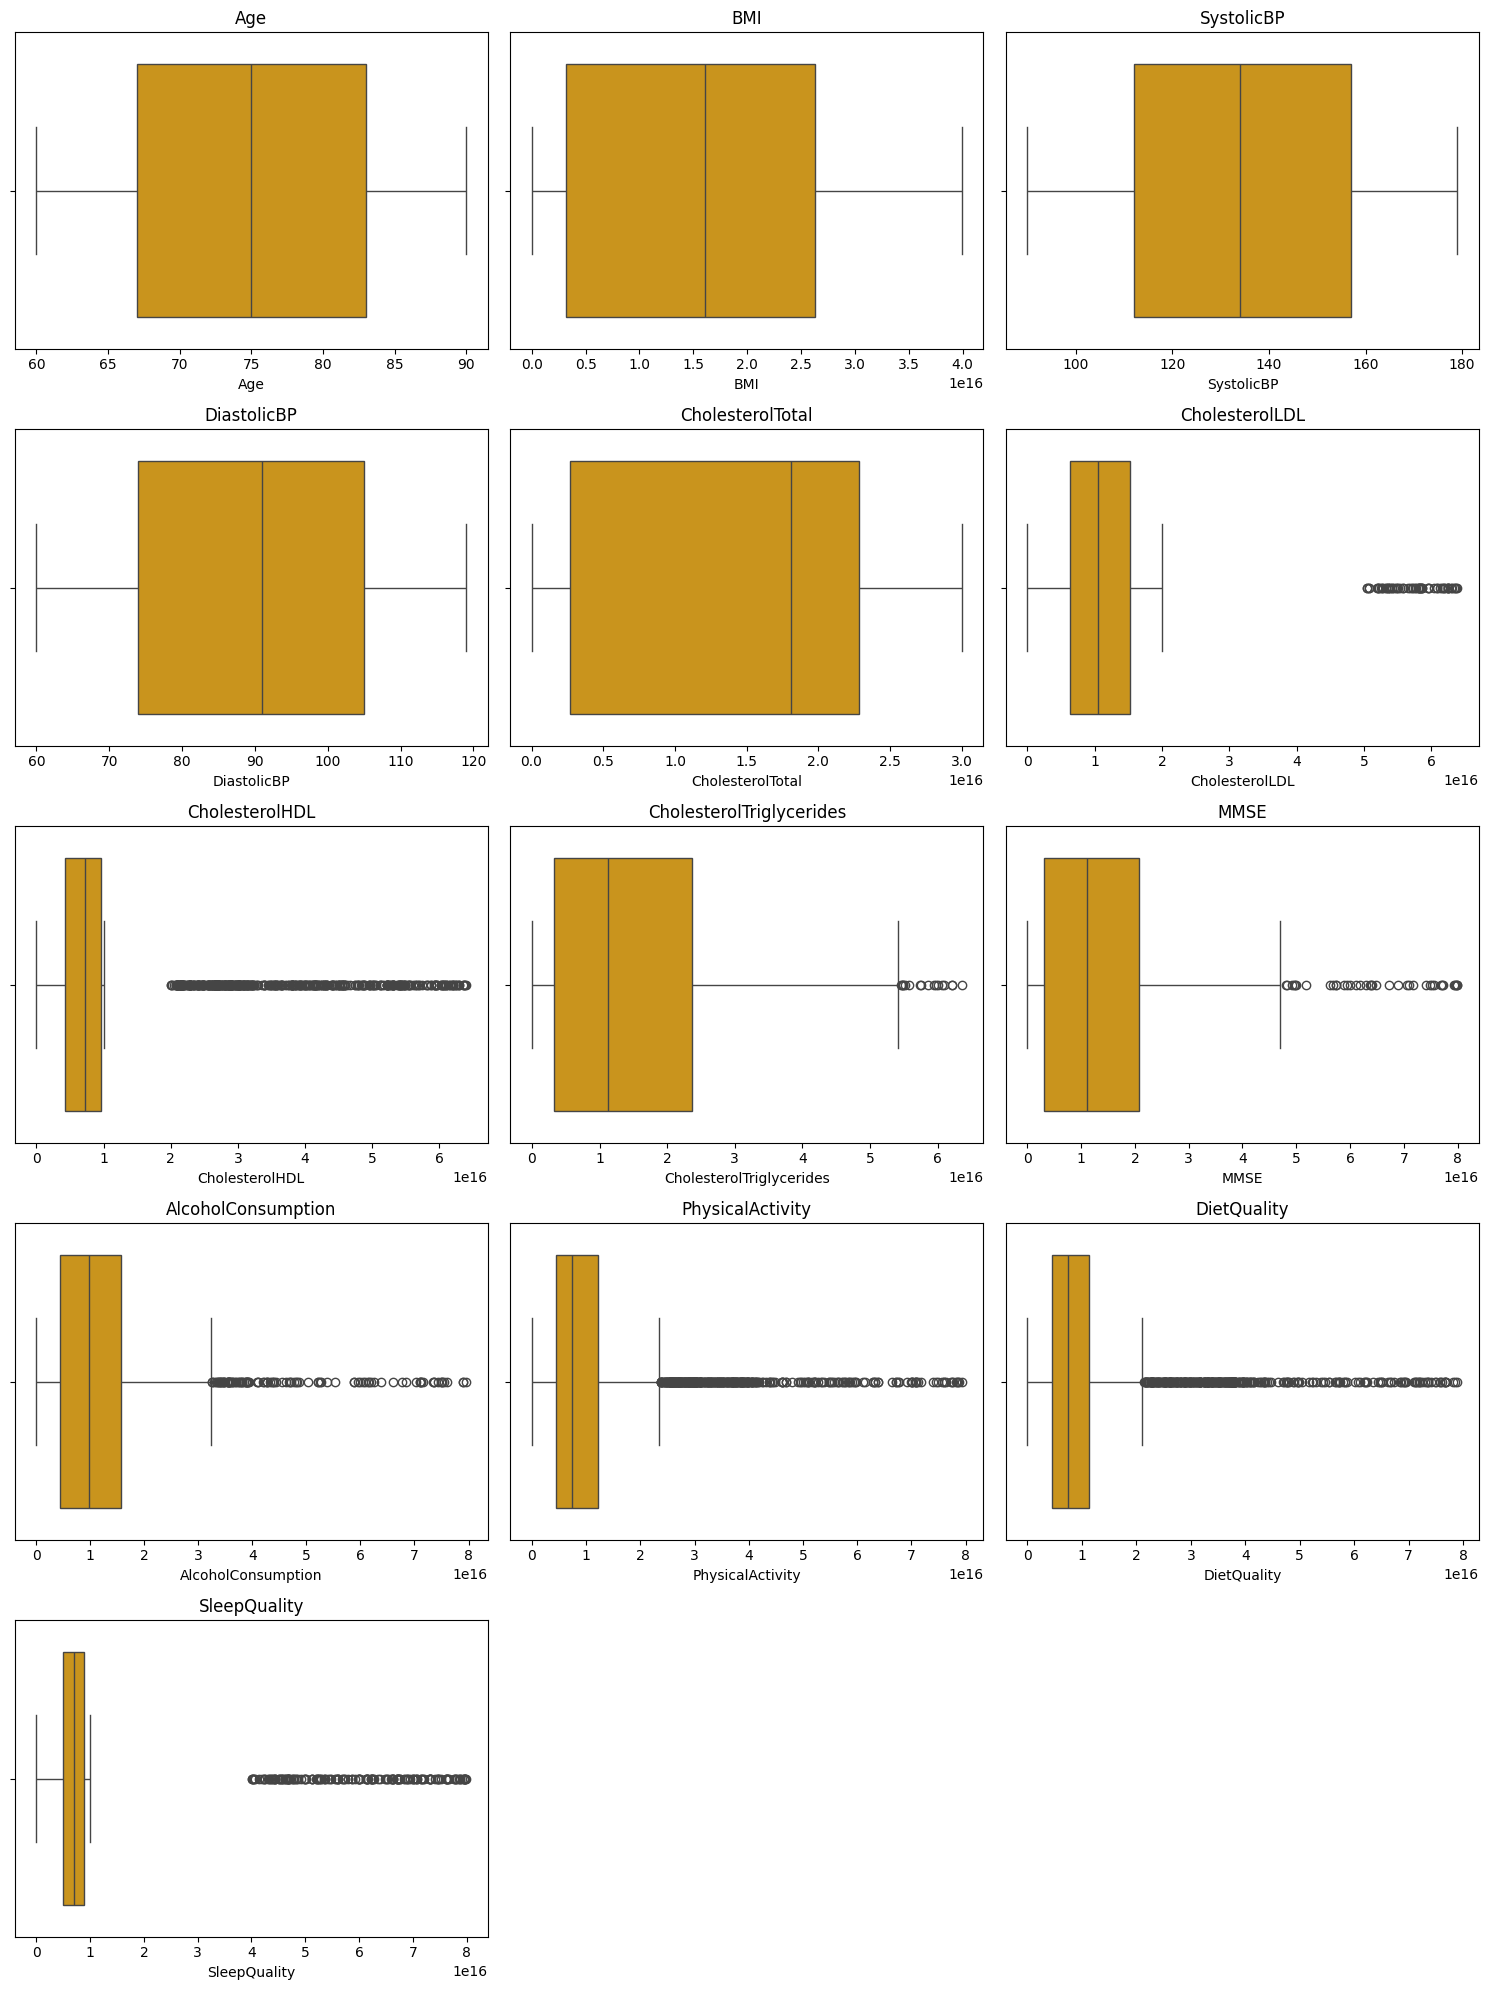

In [ ]:
# Visualizar todos los boxplots en una sola figura con subplots
n_vars = len(numeric_vars)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_vars):
    s = df[col].dropna()
    sns.boxplot(x=s, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)

# Ocultar subplots sobrantes, si existen
for j in range(i + 1, len(axes)):
    axes[j].axis('off')


plt.tight_layout()
plt.show()

### Analisis sobre Outliers

Ahora vamos comparar, de manera paralela, la distribución original de una variable, la distribución después de suponer eliminar los outliers y la distribución después del supuesto reemplazo de los outliers por la mediana. Esto te ayudará a ver cómo afectan estas transformaciones a la variable.

In [ ]:
def handle_outliers(var, df, method='remove'):

    s = pd.to_numeric(df[var], errors='coerce')
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR

    if method == 'remove':
        s_processed = s[(s >= lb) & (s <= ub)]
    elif method == 'replace':
        median = s.median()
        s_processed = s.copy()
        s_processed[(s < lb) | (s > ub)] = median
    else:
        raise ValueError("El método debe ser 'remove' o 'replace'")

    return s, s_processed, lb, ub

def compare_outlier_handling(var):

    # Procesar para eliminación de outliers
    s_original, s_removed, lb, ub = handle_outliers(var, df, method='remove')
    # Procesar para reemplazo de outliers
    _, s_replaced, _, _ = handle_outliers(var, df, method='replace')

    # Crear figura para comparar la distribución original y sin outliers (eliminados)
    fig, axes = plt.subplots(2, 2, figsize=(12, 6))

    # Distribución original
    sns.histplot(s_original.dropna(), bins=30, ax=axes[0,0])
    axes[0,0].set_title(f"Histograma original de {var}")
    sns.boxplot(x=s_original.dropna(), ax=axes[0,1])
    axes[0,1].set_title(f"Boxplot original de {var}")

    # Distribución sin outliers (eliminados)
    sns.histplot(s_removed.dropna(), bins=30, ax=axes[1,0])
    axes[1,0].set_title(f"Histograma sin outliers (eliminados) de {var}")
    sns.boxplot(x=s_removed.dropna(), ax=axes[1,1])
    axes[1,1].set_title(f"Boxplot sin outliers (eliminados) de {var}")

    plt.tight_layout()
    plt.show()

    # Crear figura para comparar el método de reemplazo
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(s_replaced.dropna(), bins=30, ax=axes[0])
    axes[0].set_title(f"Histograma con outliers reemplazados en {var}")
    sns.boxplot(x=s_replaced.dropna(), ax=axes[1])
    axes[1].set_title(f"Boxplot con outliers reemplazados en {var}")
    plt.tight_layout()
    plt.show()


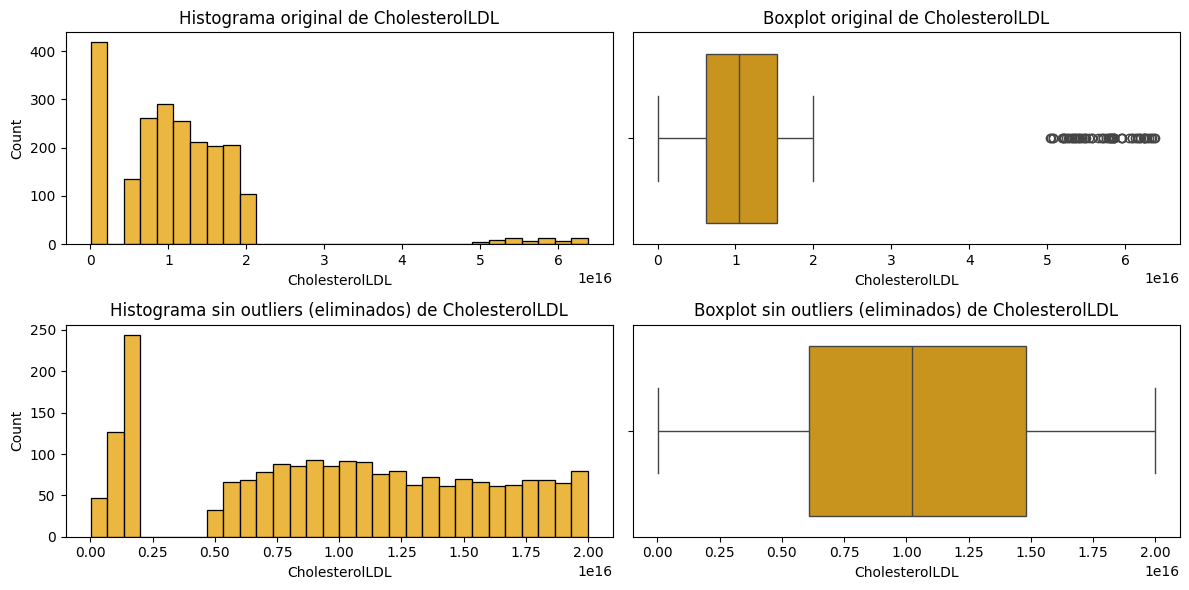

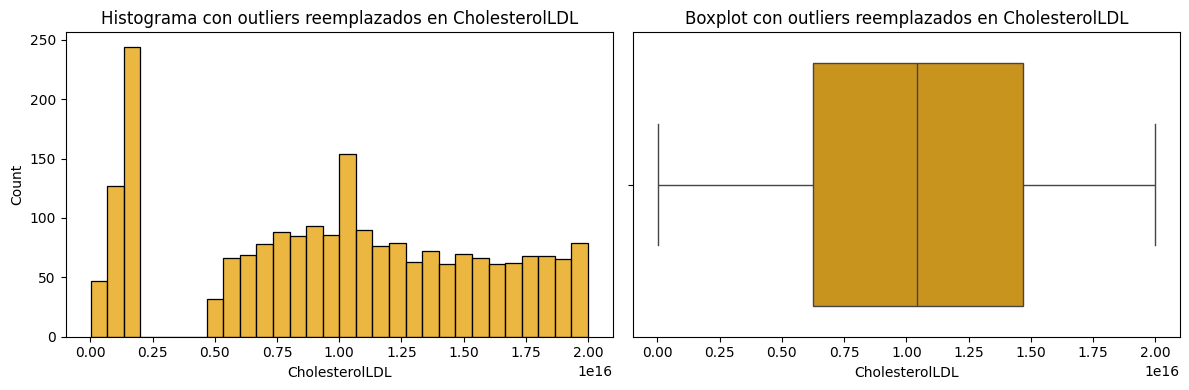

In [ ]:
# Analiza la variable CholesterolLDL
compare_outlier_handling('CholesterolLDL')

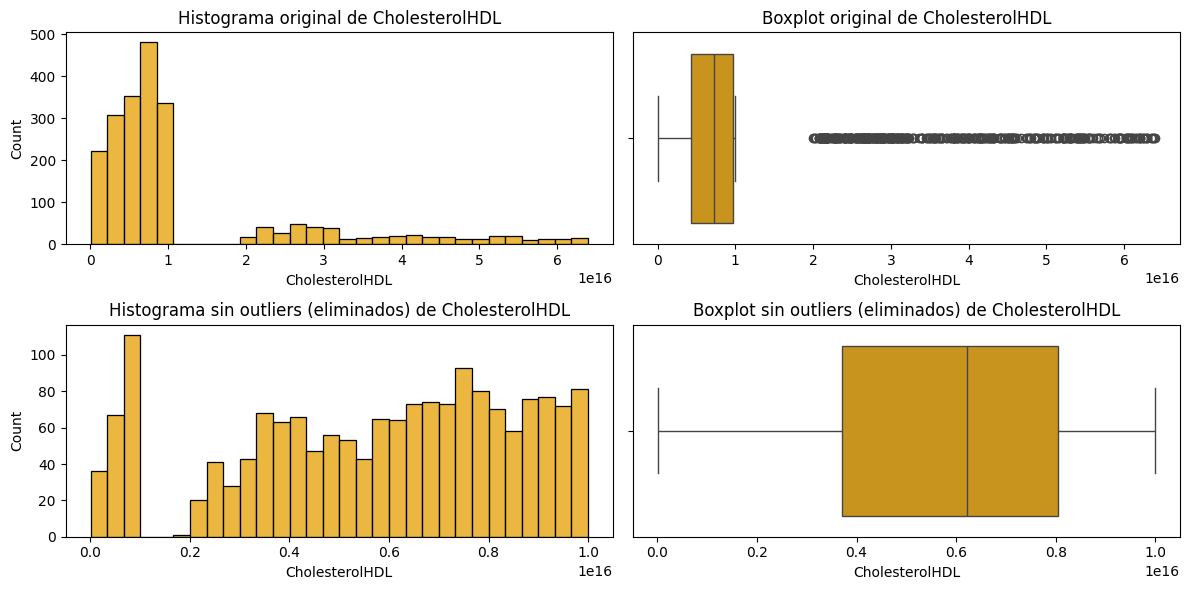

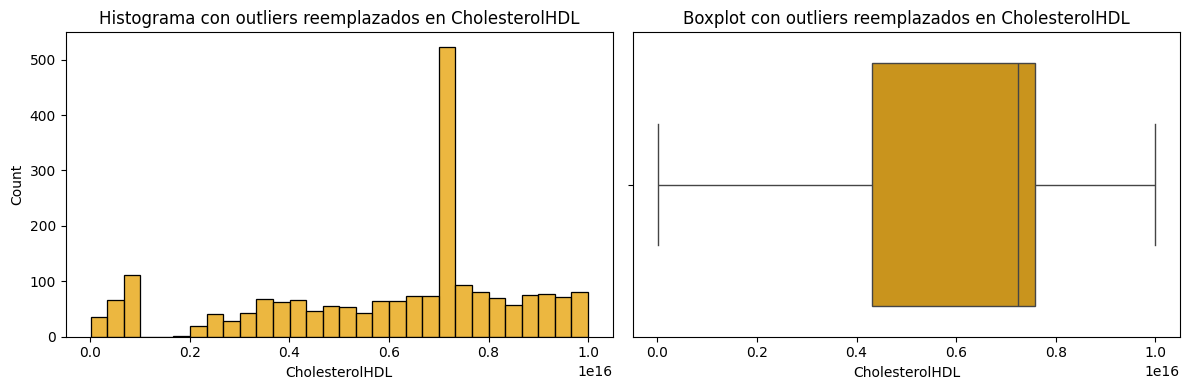

In [ ]:
# Analiza la variable CholesterolHDL
compare_outlier_handling('CholesterolHDL')

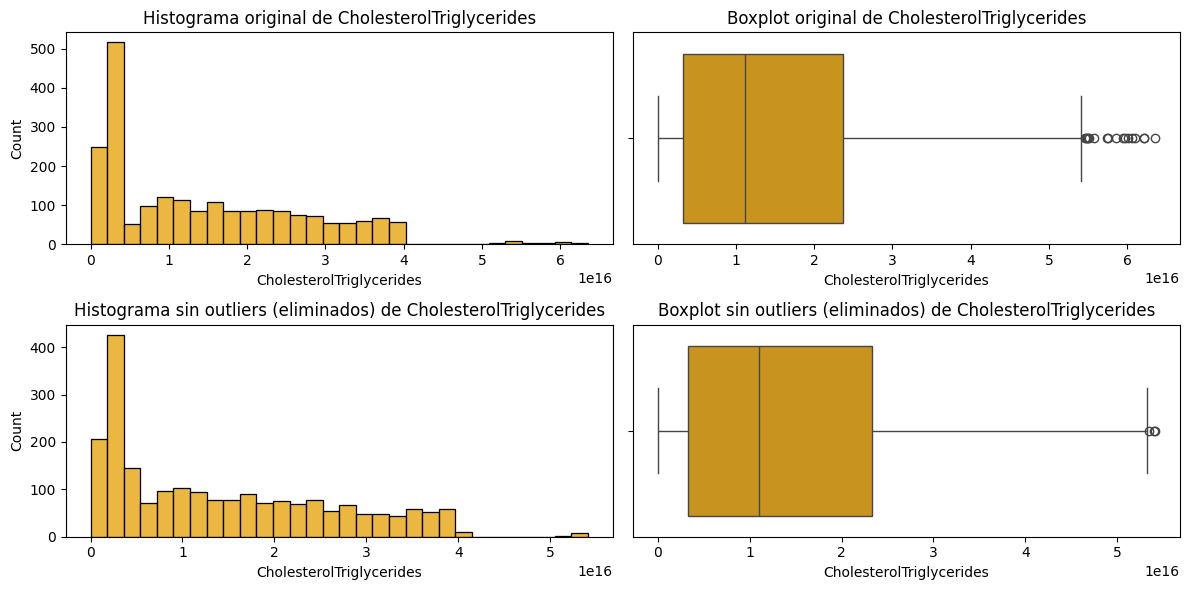

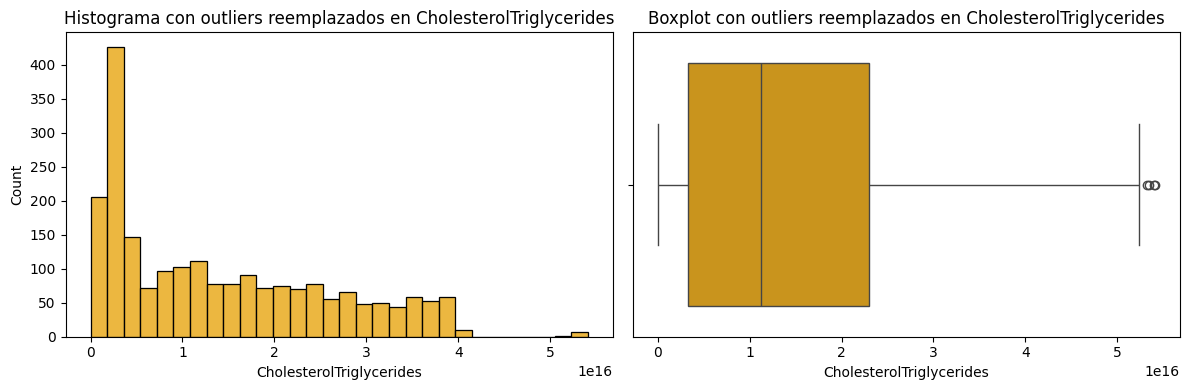

In [ ]:
# Analiza la variable CholesterolTriglycerides
compare_outlier_handling('CholesterolTriglycerides')

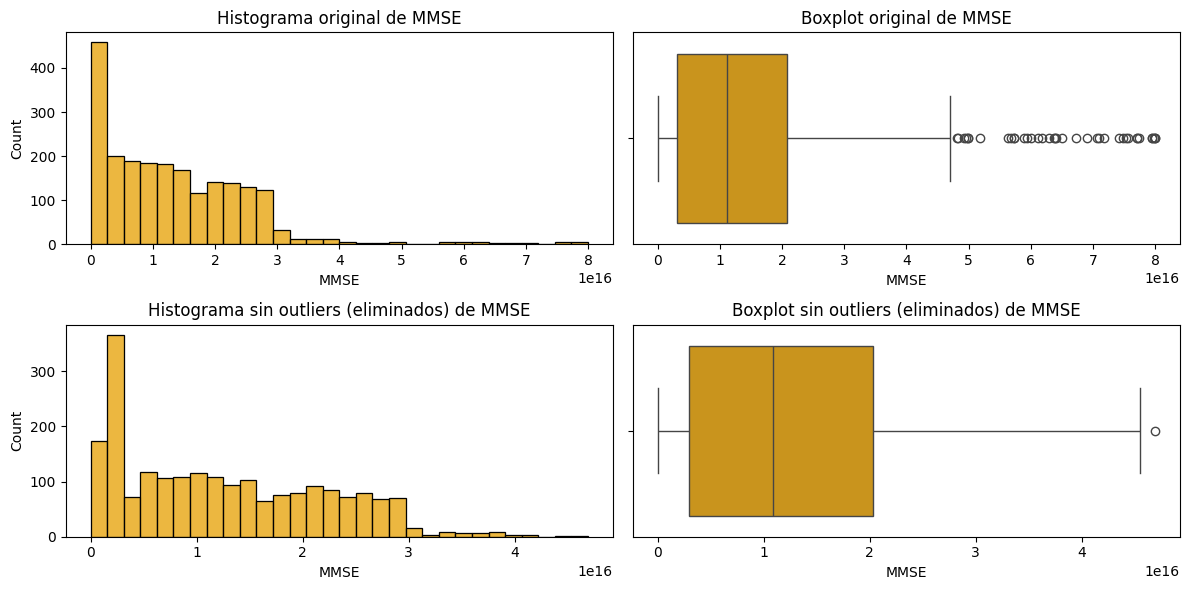

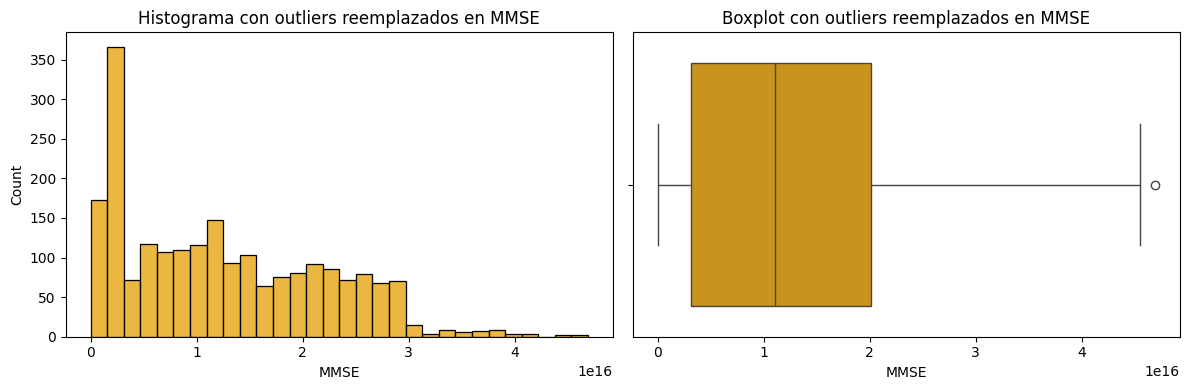

In [ ]:
# Analiza la variable MMSE
compare_outlier_handling('MMSE')

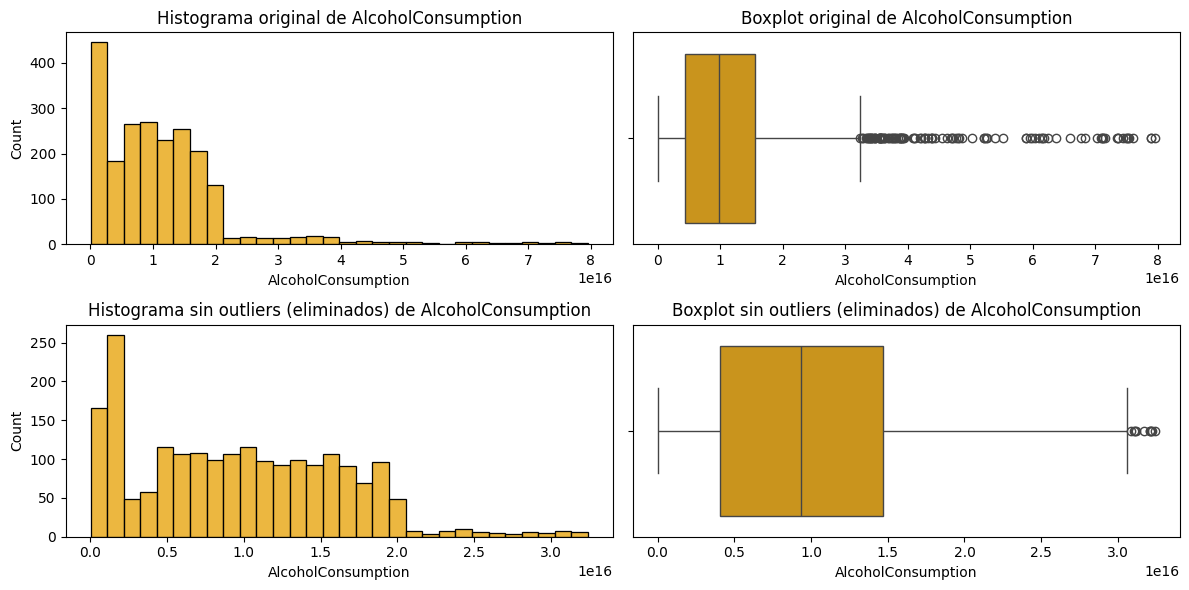

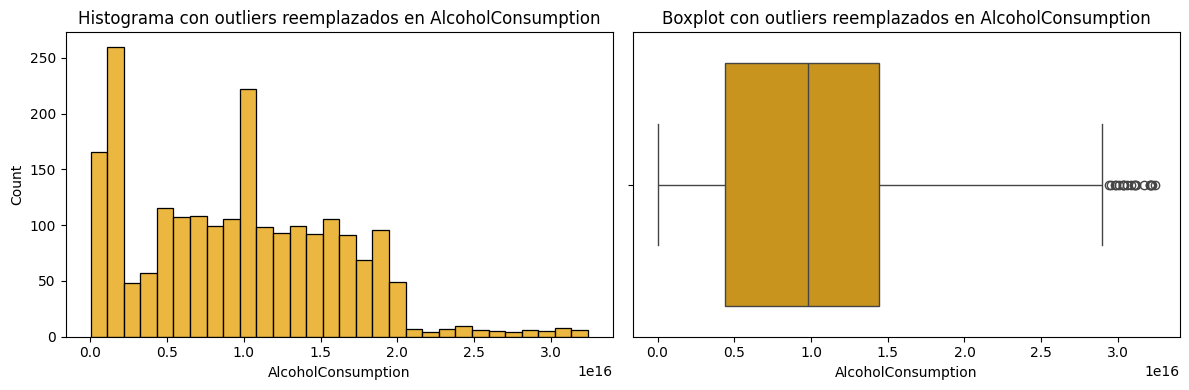

In [ ]:
# Analiza la variable MMSEAlcoholConsumption
compare_outlier_handling('AlcoholConsumption')

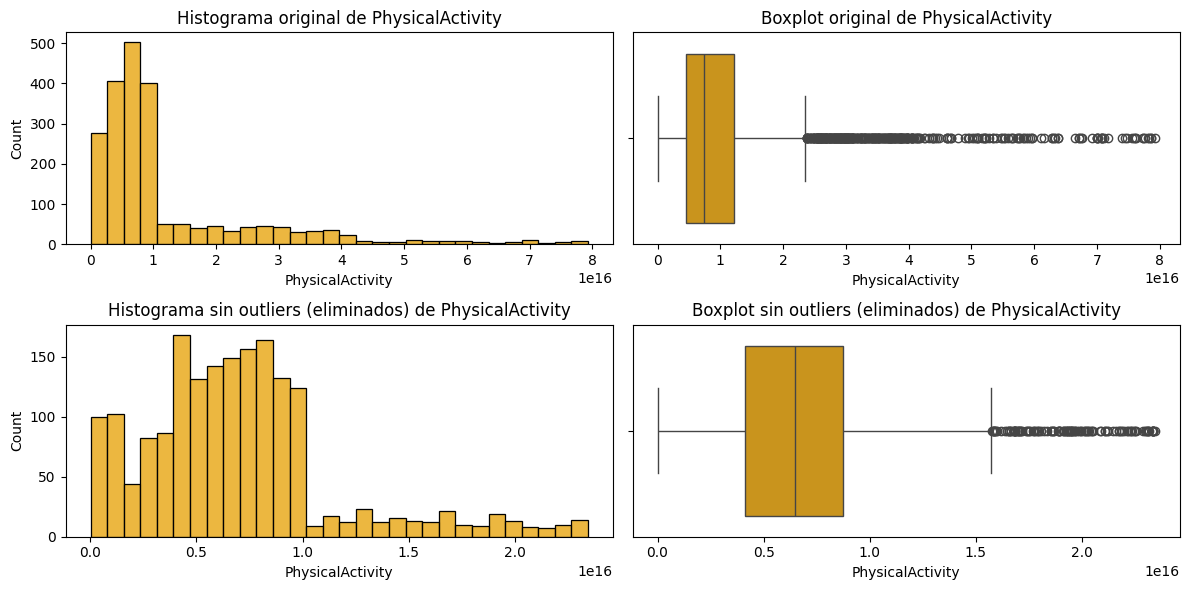

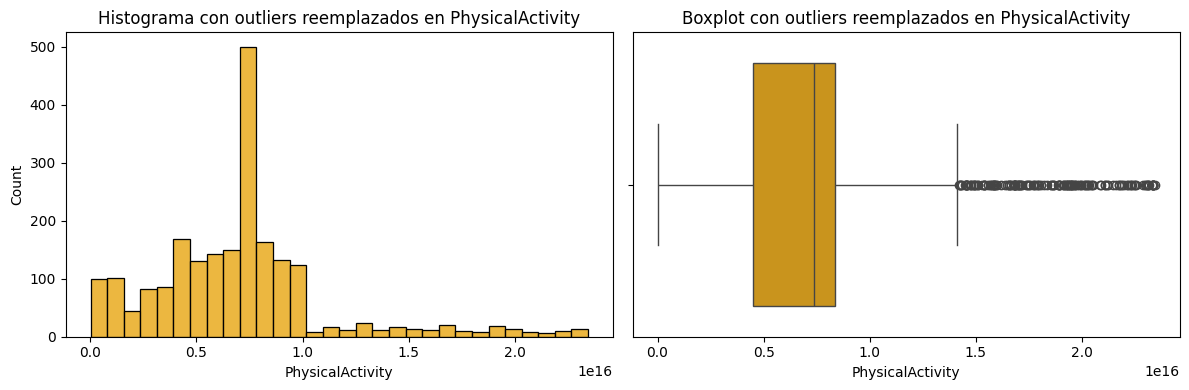

In [ ]:
# Analiza la variable PhysicalActivity
compare_outlier_handling('PhysicalActivity')

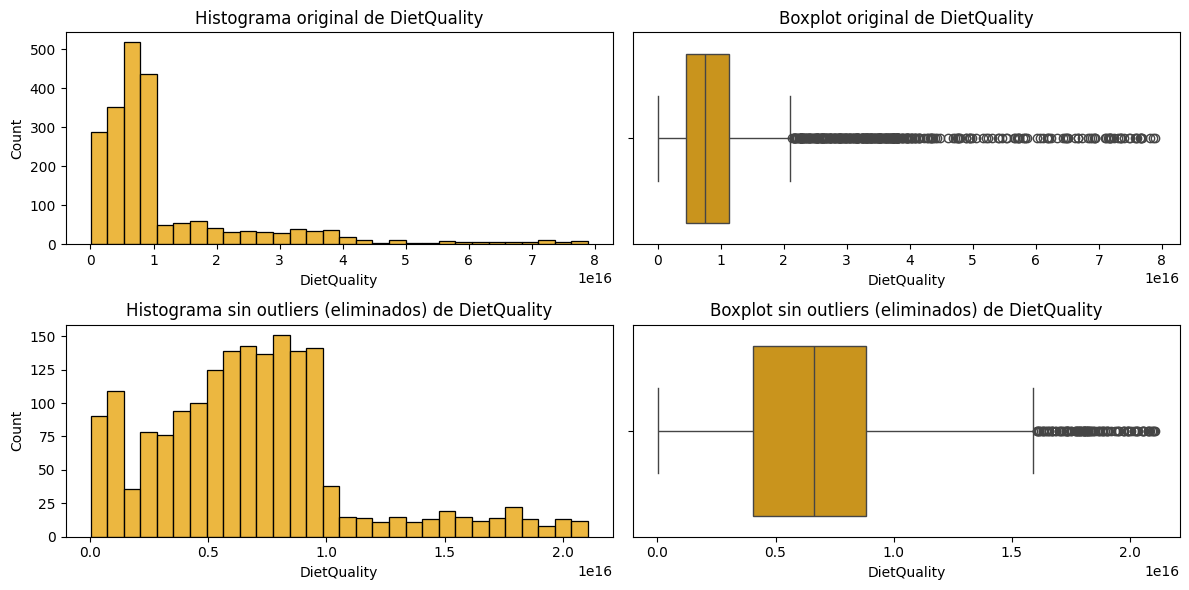

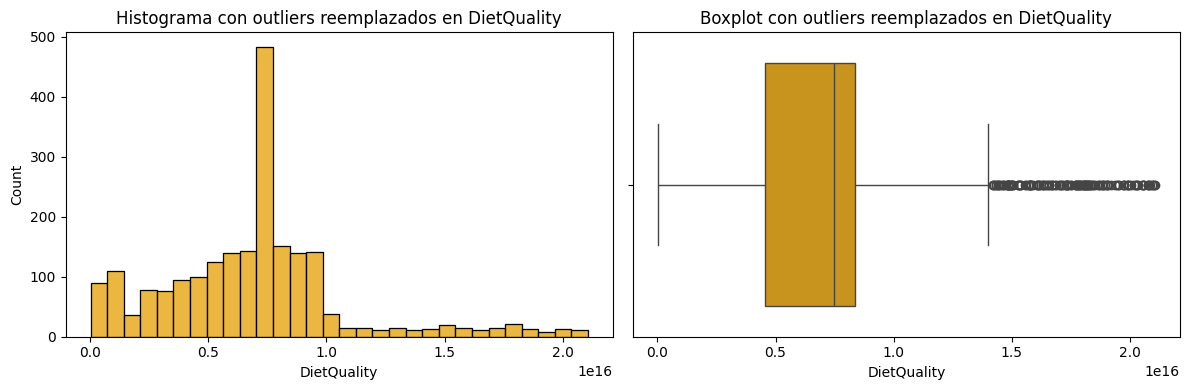

In [ ]:
# Analiza la variable DietQuality
compare_outlier_handling('DietQuality')

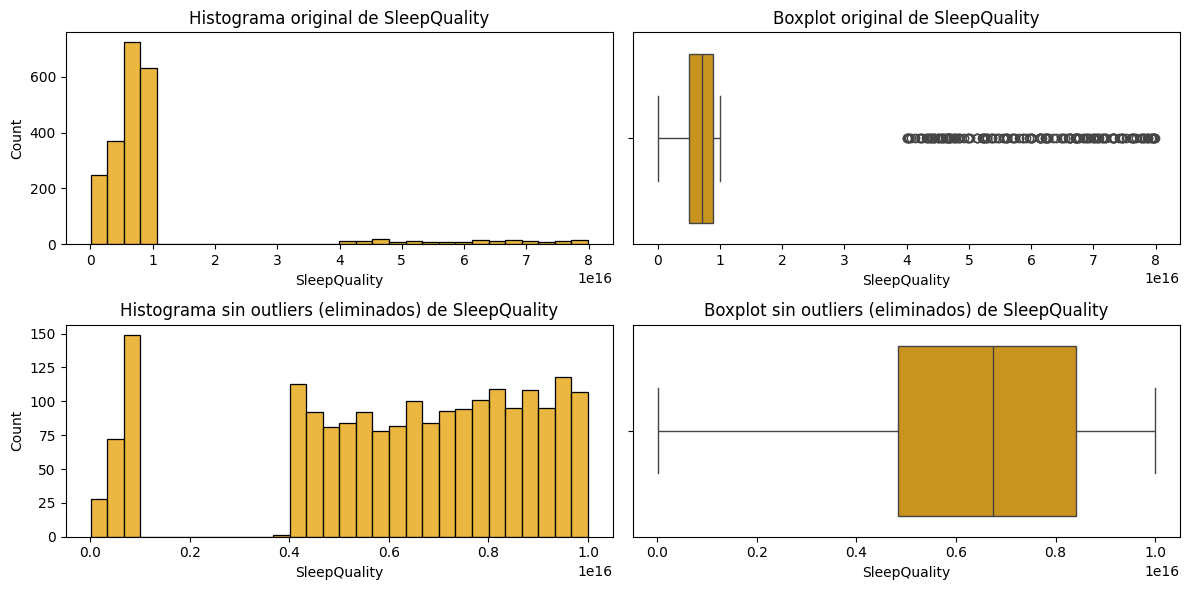

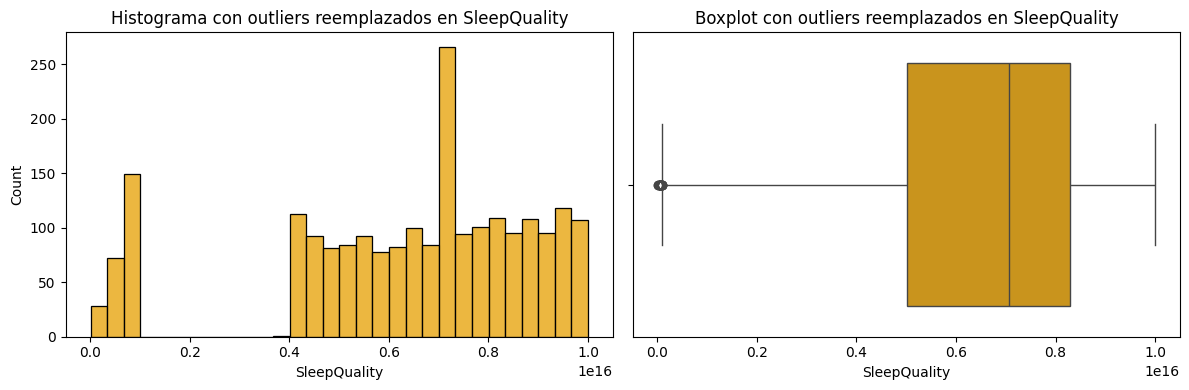

In [ ]:
# Analiza la variable SleepQuality
compare_outlier_handling('SleepQuality')

Dado que los outliers en estas variables están a órdenes de magnitud superiores a la mayoría de los datos y es probable que sean errores de captura o transformación, es fundamental tratarlos para evitar que distorsionen el análisis y el modelo.

En este caso, optaremos reemplazar los outliers por la mediana, ya que permite mantener todos los registros y a la vez atenuar el impacto de esos valores extremos que parecen ser anómalos.

En el caso de AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, dado que considero que estos valores son totalmente posibles, recomiendo mantenerlos en el análisis. Si más adelante observo que afectan negativamente al desempeño del modelo, podría explorar transformaciones específicas para mitigar su impacto.

### Reemplazo los outliers de la variables por la mediana.

In [ ]:
def replace_outliers_with_median(var, df):

    # Convertir la variable a numérico
    s = pd.to_numeric(df[var], errors='coerce')
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    median_value = s.median()

    # Reemplazar los valores fuera de los límites por la mediana
    df.loc[(s < lb) | (s > ub), var] = median_value
    return df

# Lista de variables a procesar
variables_to_replace = ['CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE']

# Aplicar la función a cada variable
for var in variables_to_replace:
    df = replace_outliers_with_median(var, df)


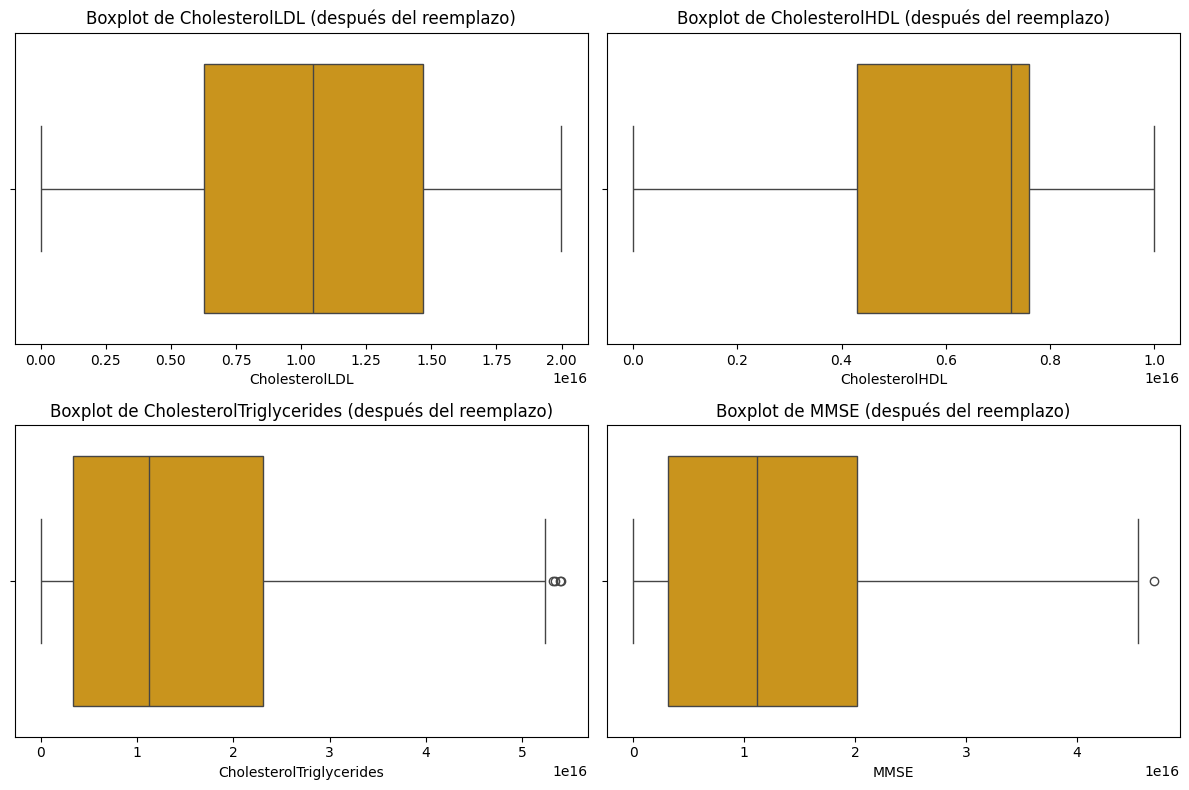

In [ ]:
# Lista de variables para verificar
variables_to_check = ['CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE']

# Crear una figura con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # Para iterar de manera sencilla

for i, var in enumerate(variables_to_check):
    sns.boxplot(x=df[var], ax=axes[i])
    axes[i].set_title(f"Boxplot de {var} (después del reemplazo)")
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()

##Analisis Univariado, Numericas y Categoricas

### Numericas

In [ ]:
def plot_variable_distribution(var):

    if var in df.columns:
        plt.figure(figsize=(12, 4))

        # Histograma
        plt.subplot(1, 2, 1)
        sns.histplot(df[var], bins=30)
        plt.title(f"Histograma de {var}")
        plt.xlabel(var)

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[var])
        plt.title(f"Boxplot de {var}")
        plt.xlabel(var)

        plt.tight_layout()
        plt.show()

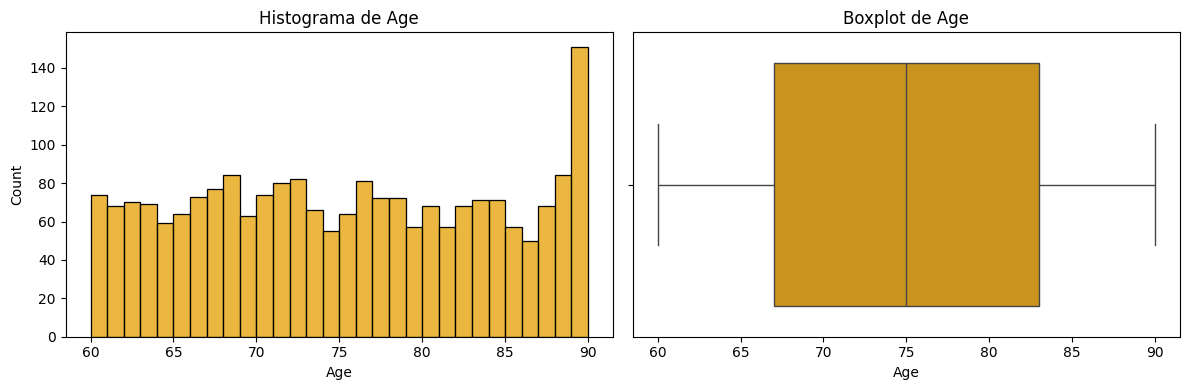

In [ ]:
# Age: Edad, van desde los 60 a 90 años.
plot_variable_distribution('Age')

El histograma sugiere que, en este estudio, hay un número considerable de pacientes de 90 años, lo que podría reflejar la realidad de la población de edad avanzada o un sesgo en la selección de la muestra.

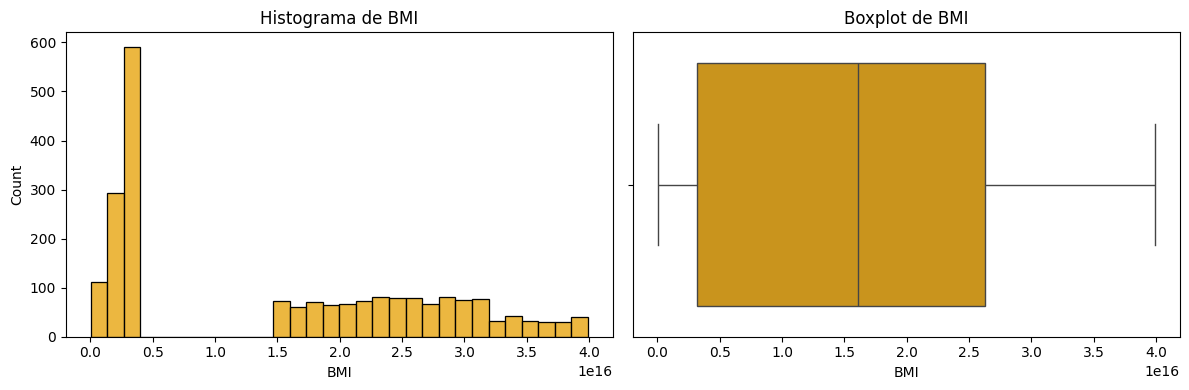

In [ ]:
# BMI: Índice de Masa Corporal de los pacientes, que van de 15 a 40.
plot_variable_distribution('BMI')

El histograma y el boxplot de BMI confirman que los datos se comportan de forma esperada dentro del rango de 15 a 40, con una concentración de valores en la zona media y sin presencia de outliers notables

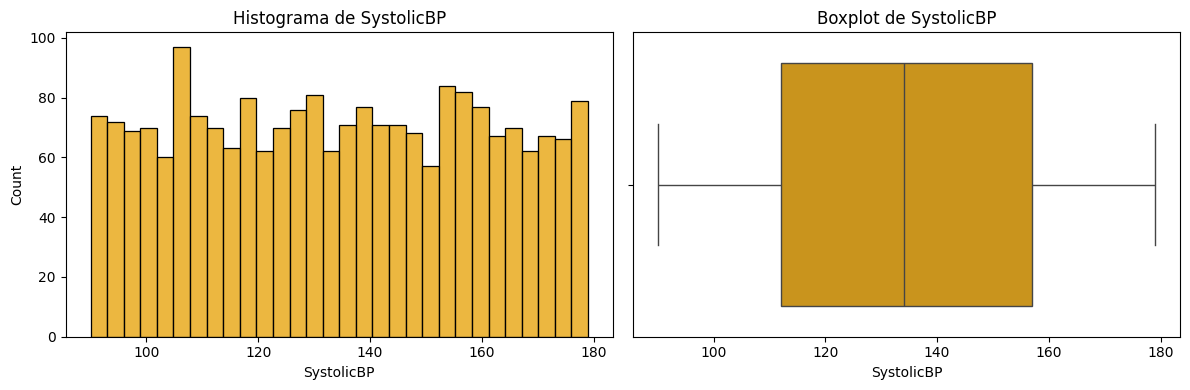

In [ ]:
# SystolicBP: Presión arterial sistólica, que varía de 90 a 180 mmHg.
plot_variable_distribution('SystolicBP')

La presión arterial sistólica se distribuye de forma bastante normal dentro del rango de 90 a 180 mmHg, sin outliers significativos, y la mayoría de los pacientes se agrupan alrededor del rango central

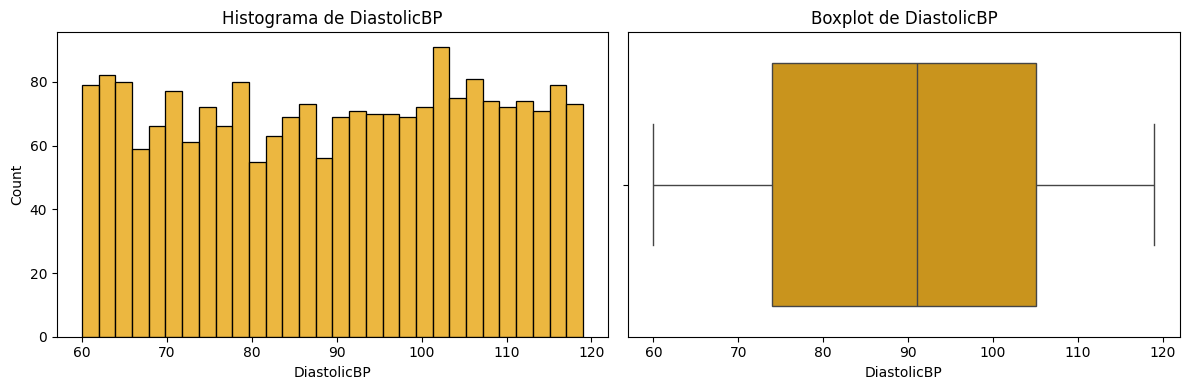

In [ ]:
# DiastolicBP: Presión arterial diastólica, que varía de 60 a 120 mmHg.
plot_variable_distribution('DiastolicBP')

La presión arterial diastólica en la muestra se comporta de manera consistente, con la mayoría de los pacientes presentando valores dentro del rango normal (60 a 120 mmHg).

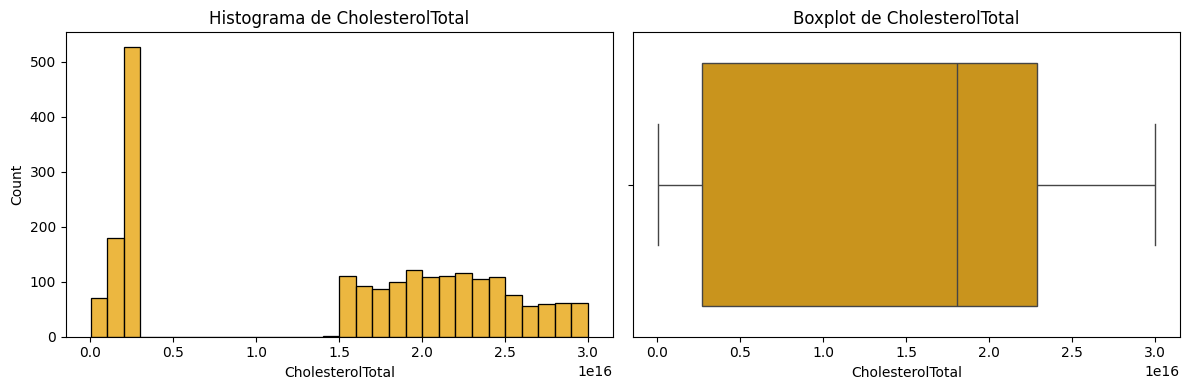

In [ ]:
# CholesterolTotal: Niveles de colesterol total, que van desde 150 a 300 mg/dL.
plot_variable_distribution('CholesterolTotal')

La distribución de CholesterolTotal es coherente con lo esperado, ya que la mayoría de los pacientes tienen niveles de colesterol dentro del rango normal (150 a 300 mg/dL), sin evidencia de valores atípicos significativos.

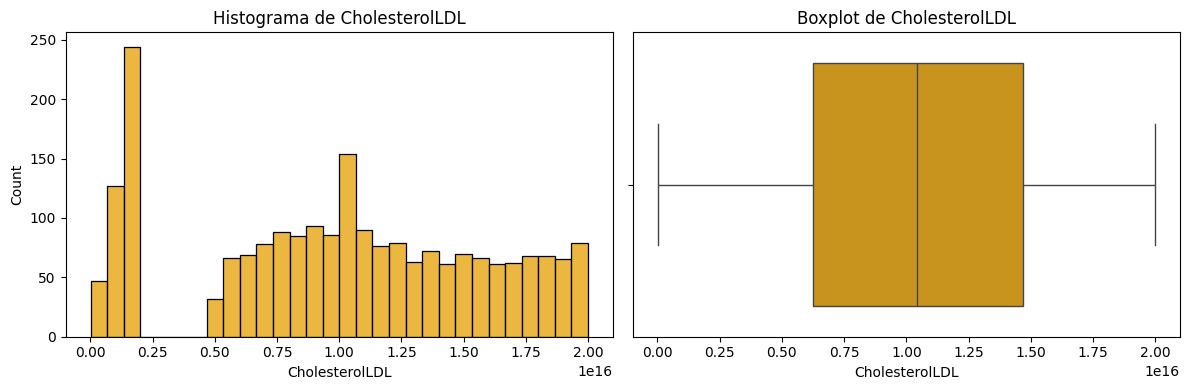

In [ ]:
# CholesterolLDL: Niveles de colesterol de lipoproteínas de baja densidad, que varían de 50 a 200 mg/dL.
plot_variable_distribution('CholesterolLDL')

La distribución de CholesterolLDL indica que la mayoría de los pacientes tienen niveles dentro del rango normal (50 a 200 mg/dL), con una concentración central de valores.

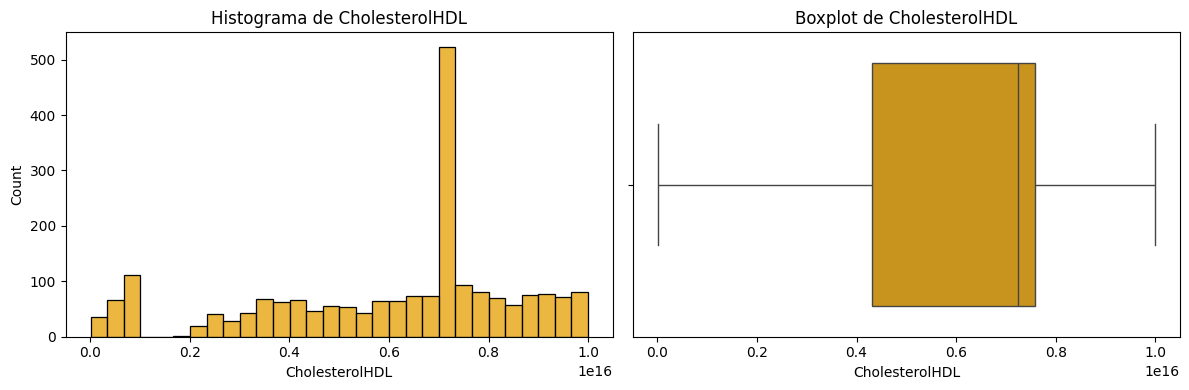

In [ ]:
# CholesterolHDL: Niveles de colesterol de lipoproteínas de alta densidad, que van de 20 a 100 mg/dL.
plot_variable_distribution('CholesterolHDL')

La distribución de CholesterolHDL es coherente con lo clínicamente esperado, con la mayoría de los registros concentrados en el rango de 20 a 100 mg/dL. El histograma y el boxplot indican que la mayoría de los valores se agrupan en torno a los niveles típicos (por ejemplo, 40–60 mg/dL), con pocos outliers.

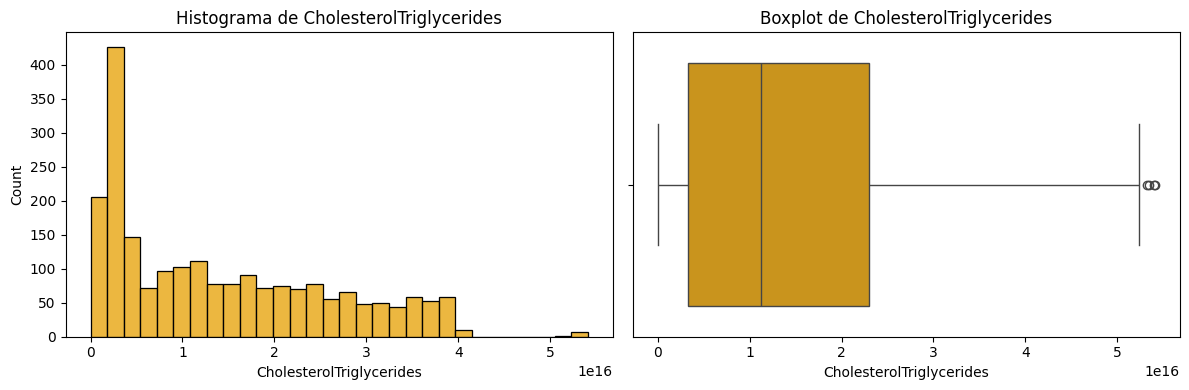

In [ ]:
# CholesterolTriglycerides: Niveles de triglicéridos, que varían de 50 a 400 mg/dL.
plot_variable_distribution('CholesterolTriglycerides')

La distribución de CholesterolTriglycerides es, en general, coherente con el rango esperado de 50 a 400 mg/dL, con la mayoría de los pacientes concentrados en niveles intermedios. Sin embargo, el boxplot revela la presencia de algunos outliers que indican que ciertos pacientes presentan niveles de triglicéridos notablemente diferentes.

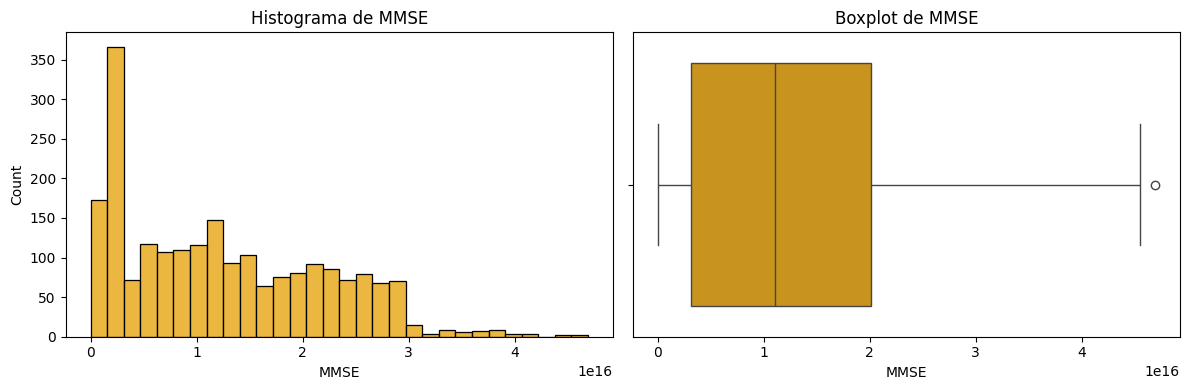

In [ ]:
#MMSE: Puntuación del examen del Estado Mini-Mental, que varía de 0 a 30. Las puntuaciones más bajas indican deterioro cognitivo.
plot_variable_distribution('MMSE')

La distribución de MMSE se ajusta al rango esperado (0 a 30). La mayoría de los pacientes tienen puntajes altos, lo que sugiere buen rendimiento cognitivo, pero también se observan algunos casos con puntuaciones bajas que indican deterioro cognitivo.

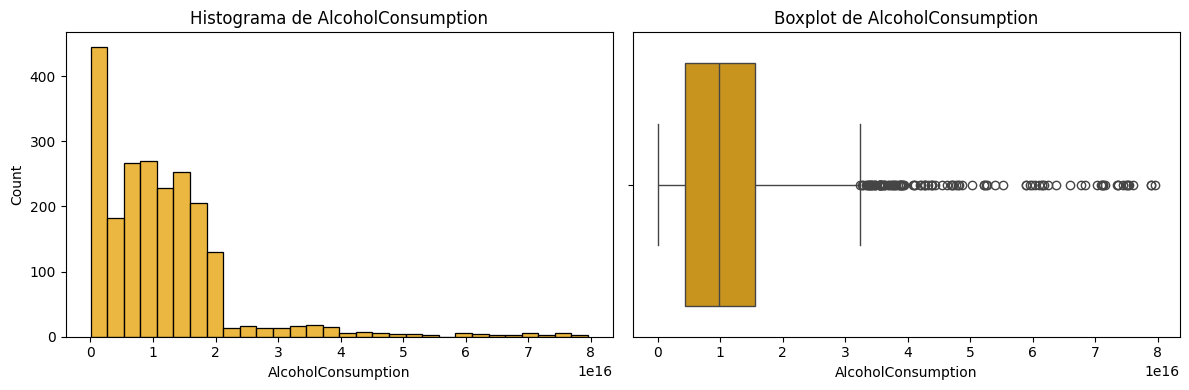

In [ ]:
# AlcoholConsumption: Consumo semanal de alcohol en unidades, que van de 0 a 20.
plot_variable_distribution('AlcoholConsumption')

El análisis de AlcoholConsumption sugiere que la mayoría de los pacientes tienen un consumo semanal bajo (probablemente entre 0 y 2 unidades), pero existen algunos casos atípicos con consumos mayores. Esto indica que, si bien el consumo de alcohol es generalmente bajo en la muestra, hay una variabilidad significativa en algunos individuos que podría ser relevante en el análisis clínico y predictivo.

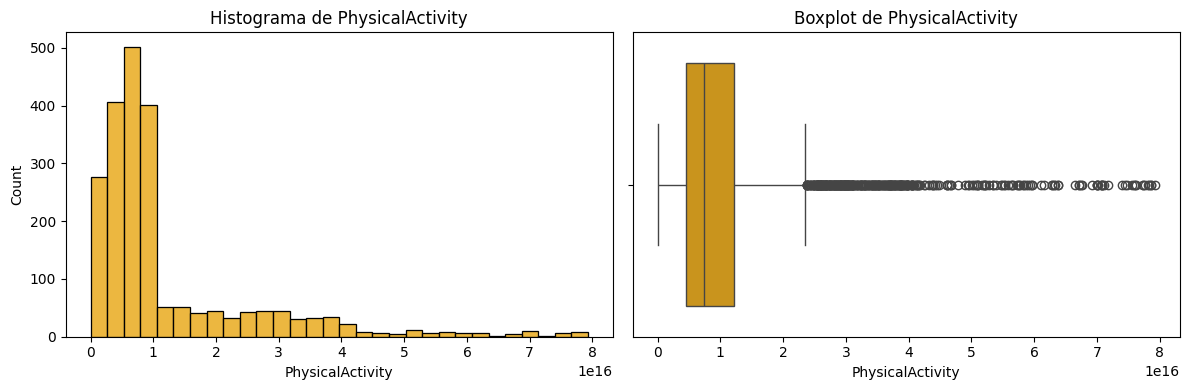

In [ ]:
# PhysicalActivity: Actividad física semanal en horas, que van de 0 a 10.
plot_variable_distribution('PhysicalActivity')

El análisis de PhysicalActivity indica que la mayoría de los pacientes realizan pocas horas de actividad física por semana, concentrándose en niveles bajos (0 a 3 horas), aunque existen algunos casos con actividad más elevada. Esto es típico en adultos mayores y puede aportar información sobre la variabilidad en el estilo de vida que podría relacionarse con otros factores del estudio.

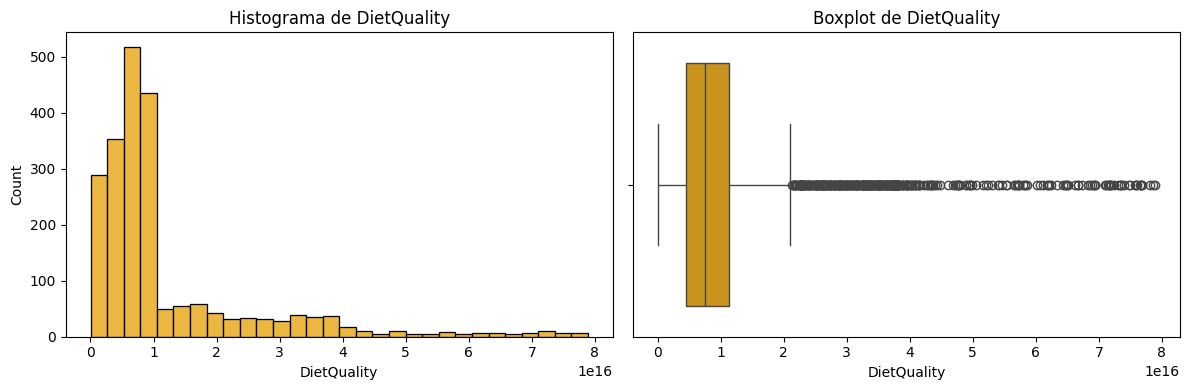

In [ ]:
# DietQuality: Puntuación de la calidad de la dieta, que varía de 0 a 10.
plot_variable_distribution('DietQuality')

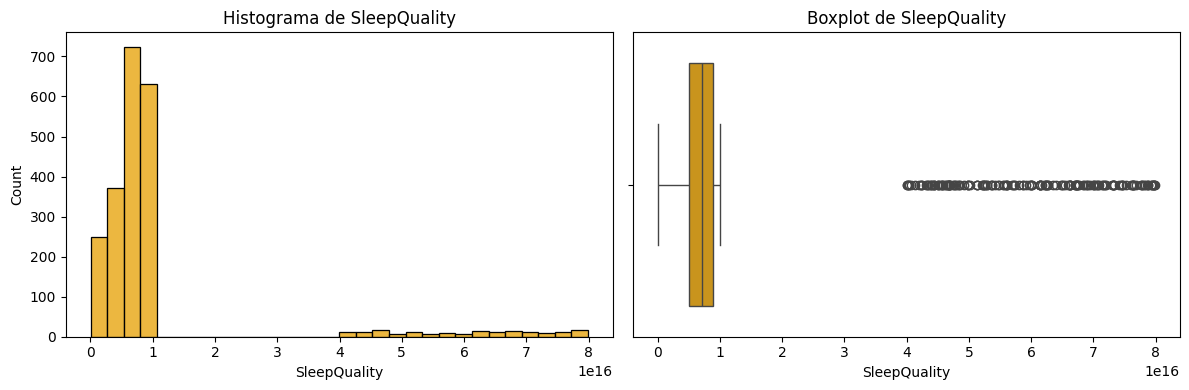

In [ ]:
# SleepQuality: Puntuación de calidad del sueño, que varía de 4 a 10.
plot_variable_distribution('SleepQuality')

El análisis de DietQuality indica que, tras el escalado, la mayoría de los pacientes tienen una puntuación de calidad de la dieta concentrada en un rango muy bajo (cerca de 0 a 1). Se observan pocos valores atípicos en comparación con la dispersión general, lo que sugiere que la variabilidad es limitada.

### Categoricas

In [ ]:
def plot_categorical_distribution(var):

    if var in df.columns:
        print(f"Tabla de frecuencias para {var}:")
        print(df[var].value_counts())
        plt.figure(figsize=(6, 4))
        sns.countplot(x=df[var])
        plt.title(f"Gráfico de barras de {var}")
        plt.xlabel(var)
        plt.ylabel("Frecuencia")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

Tabla de frecuencias para Gender:
Gender
1    1088
0    1061
Name: count, dtype: int64


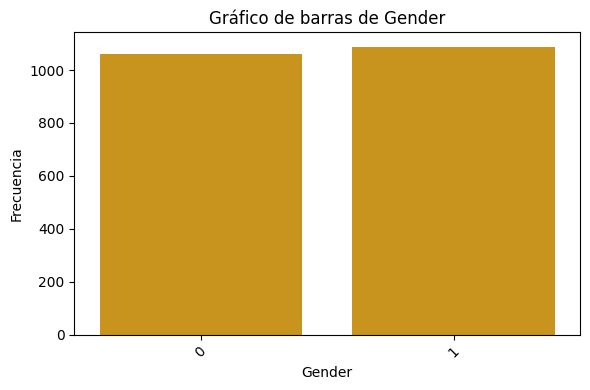

In [ ]:
# Gender: Género de los pacientes, donde 0 representa Hombre y 1 representa Mujer.
plot_categorical_distribution('Gender')

Tabla de frecuencias para Ethnicity:
Ethnicity
0    1278
1     454
3     211
2     206
Name: count, dtype: int64


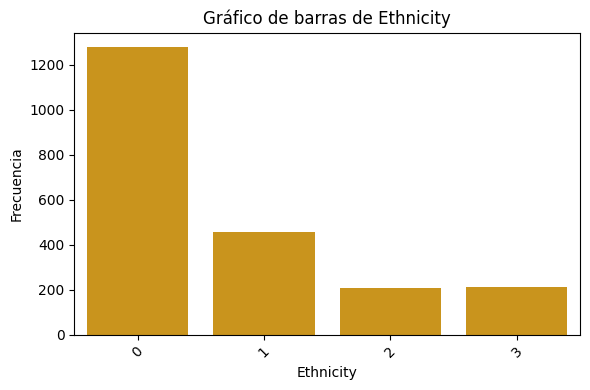

In [ ]:
# Ethnicity: El origen étnico de los pacientes, codificado de la siguiente manera: (0: Caucásico) (1: Afroamericano) (2: Asiático) (3: Otro)
plot_categorical_distribution('Ethnicity')

Tabla de frecuencias para EducationLevel:
EducationLevel
1    854
2    636
0    446
3    213
Name: count, dtype: int64


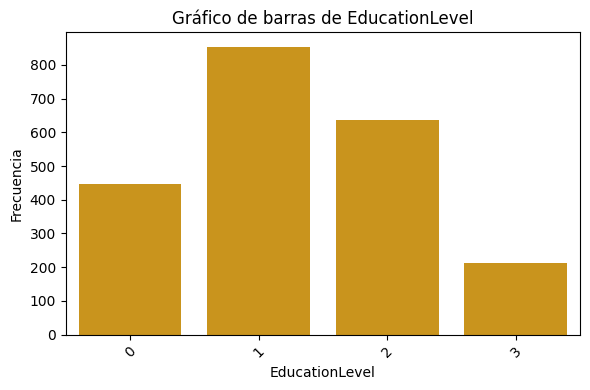

In [ ]:
# EducationLevel: El nivel educativo de los pacientes, codificado de la siguiente manera: (0: Ninguno) (1: Escuela Secundaria) (2: Licenciatura) (3: Superior)
plot_categorical_distribution('EducationLevel')

Tabla de frecuencias para Smoking:
Smoking
0    1529
1     620
Name: count, dtype: int64


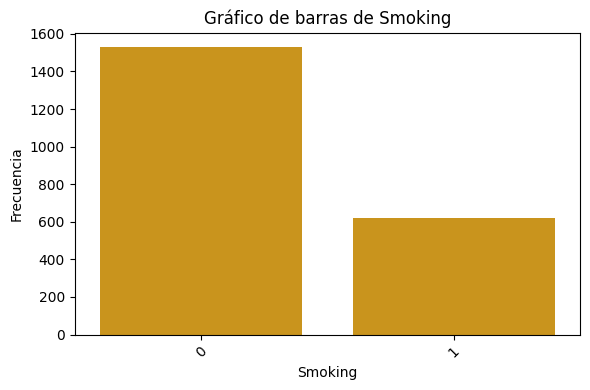

In [ ]:
# Smoking: Fumar, donde 0 indica No y 1 indica Sí.
plot_categorical_distribution('Smoking')

Tabla de frecuencias para FamilyHistoryAlzheimers:
FamilyHistoryAlzheimers
0    1607
1     542
Name: count, dtype: int64


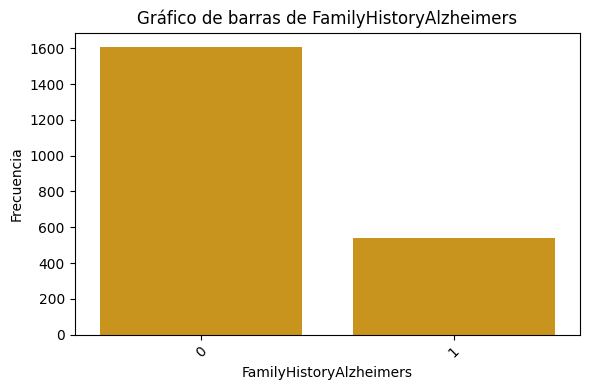

In [ ]:
# FamilyHistoryAlzheimers: Antecedentes familiares de la enfermedad de Alzheimer, donde 0 indica No y 1 indica Sí.
plot_categorical_distribution('FamilyHistoryAlzheimers')

Tabla de frecuencias para CardiovascularDisease:
CardiovascularDisease
0    1839
1     310
Name: count, dtype: int64


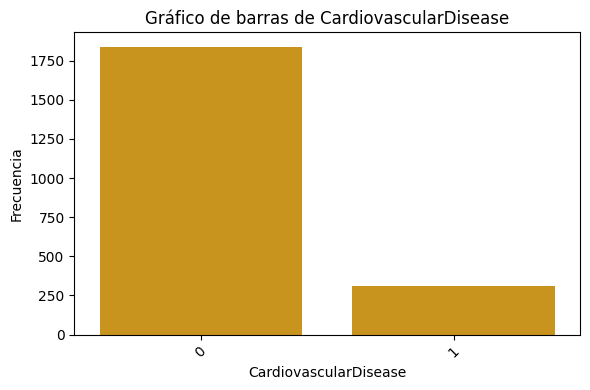

In [ ]:
# CardiovascularDisease: Presencia de enfermedad cardiovascular, donde 0 indica No y 1 indica Sí.
plot_categorical_distribution('CardiovascularDisease')

Tabla de frecuencias para Diabetes:
Diabetes
0    1825
1     324
Name: count, dtype: int64


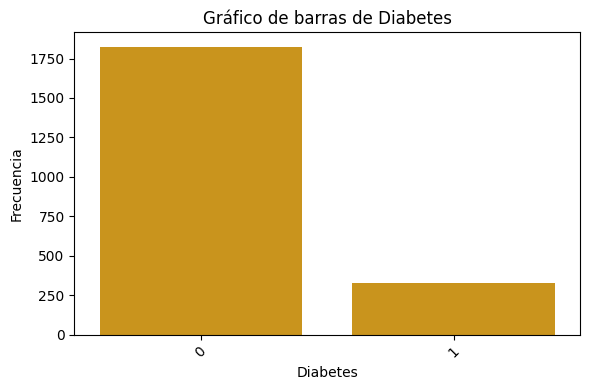

In [ ]:
# Diabetes: Presencia de diabetes, donde 0 indica No y 1 indica Sí.
plot_categorical_distribution('Diabetes')

Tabla de frecuencias para Depression:
Depression
0    1718
1     431
Name: count, dtype: int64


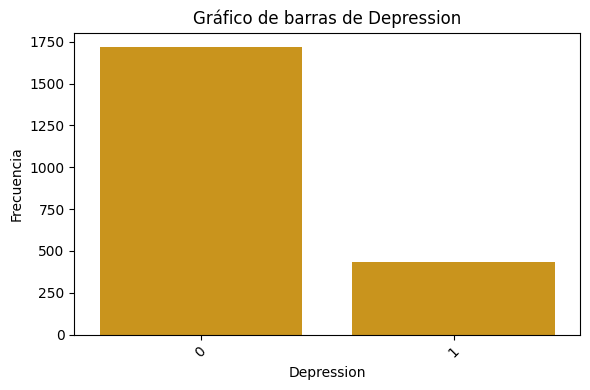

In [ ]:
# Depression: Presencia de depresión, donde 0 indica No y 1 indica Sí.
plot_categorical_distribution('Depression')

Tabla de frecuencias para HeadInjury:
HeadInjury
0    1950
1     199
Name: count, dtype: int64


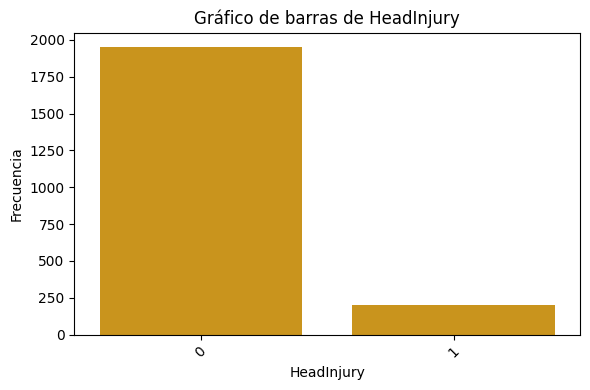

In [ ]:
# HeadInjury: Historial de lesiones en la cabeza, donde 0 indica No y 1 indica Sí.
plot_categorical_distribution('HeadInjury')

Tabla de frecuencias para Hypertension:
Hypertension
0    1829
1     320
Name: count, dtype: int64


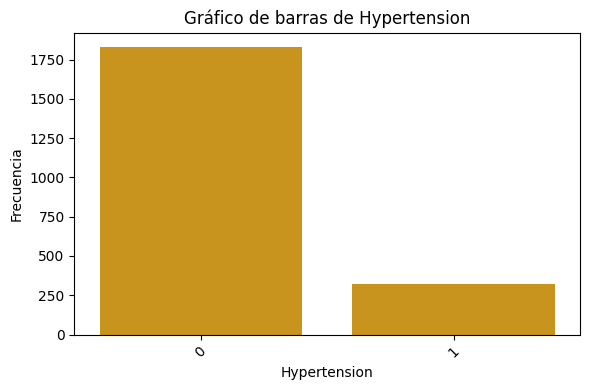

In [ ]:
# Hypertension: Presencia de hipertensión, donde 0 indica No y 1 indica Sí.
plot_categorical_distribution('Hypertension')

Tabla de frecuencias para MemoryComplaints:
MemoryComplaints
0    1702
1     447
Name: count, dtype: int64


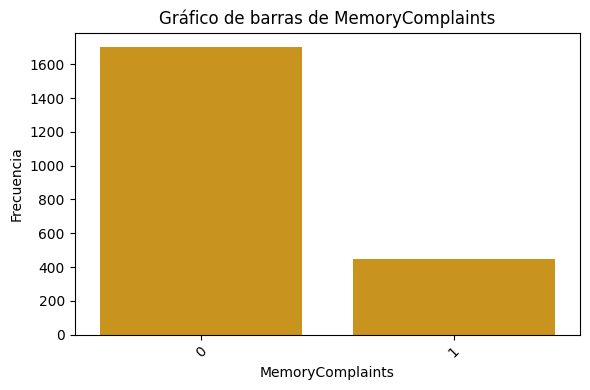

In [ ]:
# MemoryComplaints: Presencia de quejas de memoria, donde 0 indica No y 1 indica Sí.
plot_categorical_distribution('MemoryComplaints')

Tabla de frecuencias para BehavioralProblems:
BehavioralProblems
0    1812
1     337
Name: count, dtype: int64


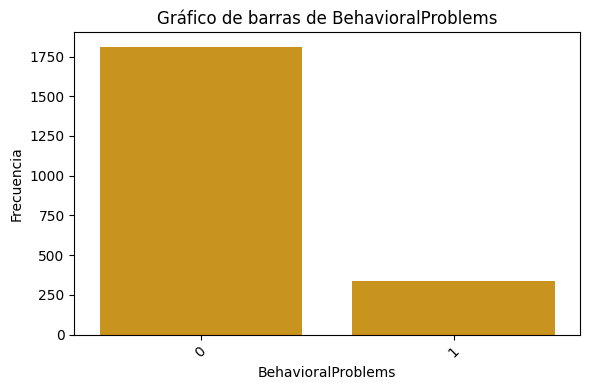

In [ ]:
# BehavioralProblems: Presencia de problemas de comportamiento, donde 0 indica No y 1 indica Sí.
plot_categorical_distribution('BehavioralProblems')

##Analisis Bivariado

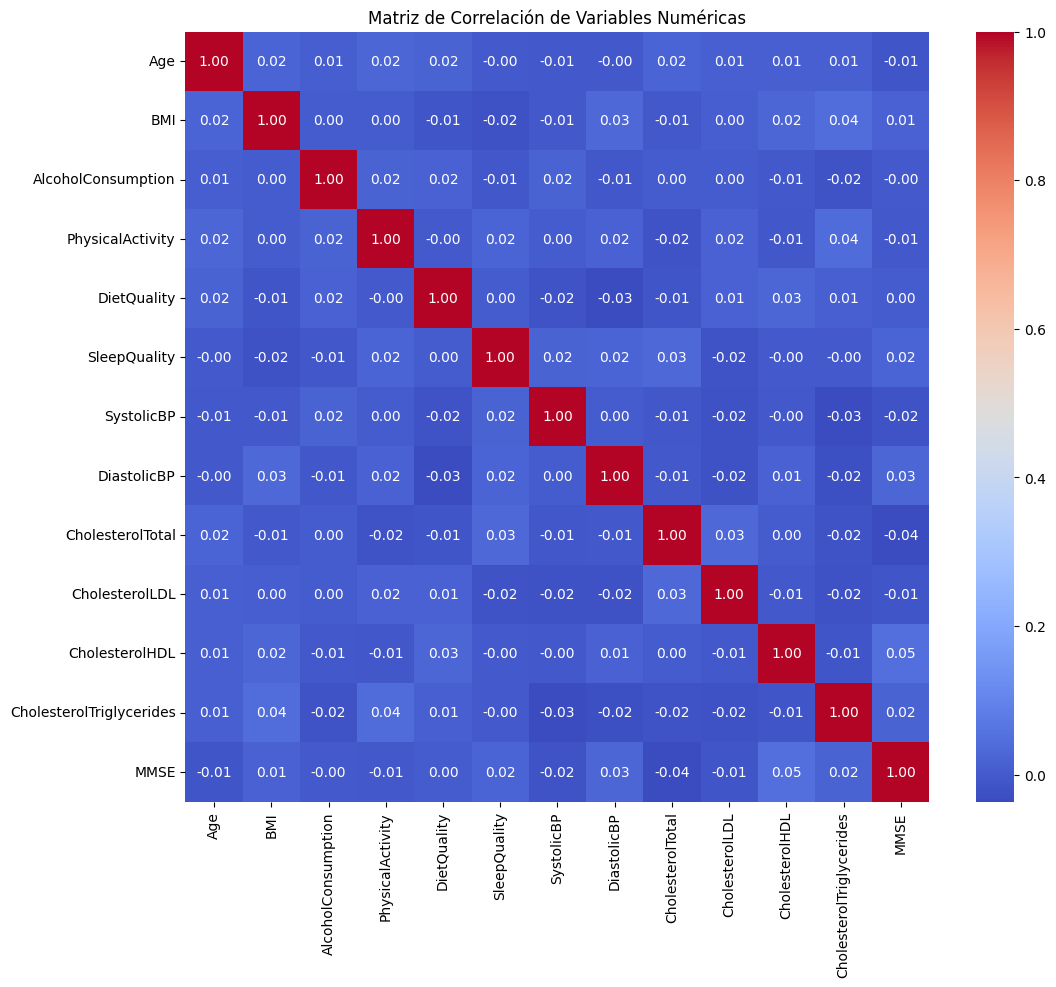

In [ ]:
# Lista de variables numéricas
num_cols = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
    'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE'
]

plt.figure(figsize=(12, 10))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

En resumen, la matriz de correlación muestra que algunas variables (como las presiones arteriales) están muy relacionadas, mientras que otras (como las variables de estilo de vida) aportan información más diversa. Esto es útil para detectar redundancias y para orientar la selección de variables en la construcción de modelos predictivos, ya que nos indica qué variables podrían combinarse o necesitar transformaciones adicionales para capturar mejor la complejidad del fenómeno.

In [ ]:
def plot_bivariate_relationship(var1, var2):

    if var1 in df.columns and var2 in df.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=var1, y=var2)
        sns.regplot(data=df, x=var1, y=var2, scatter=False, color='red')
        plt.title(f"Relación entre {var1} y {var2}")
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.show()

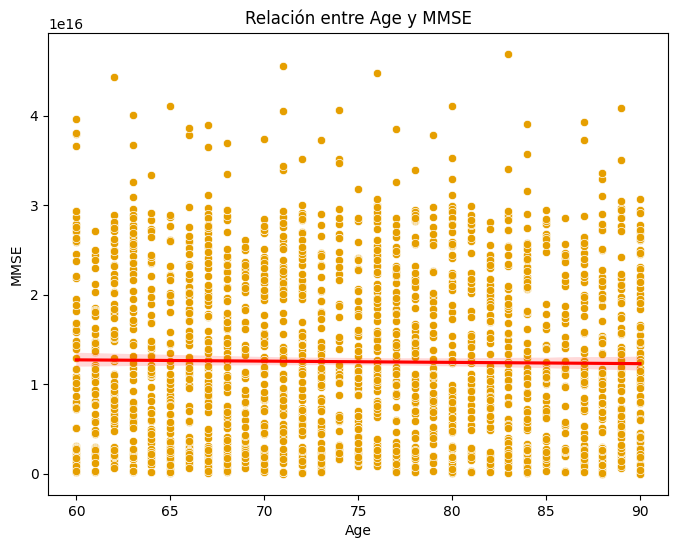

In [ ]:
# Relación entre Age y MMSE
plot_bivariate_relationship('Age', 'MMSE')

El análisis de Age vs. MMSE indica una relación negativa, en la que, en promedio, los pacientes más viejos tienen puntajes menores en el MMSE, reflejando un deterioro cognitivo asociado al envejecimiento. No obstante, la considerable dispersión sugiere la influencia de otros factores adicionales en el desempeño cognitivo.

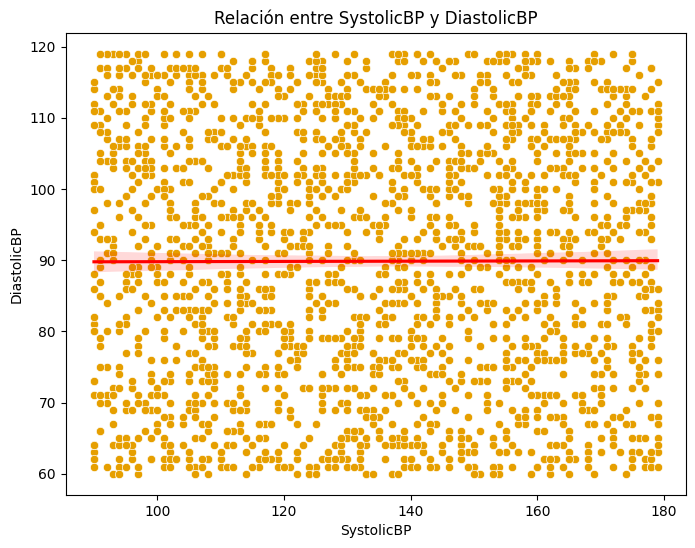

In [ ]:
# Relación entre SystolicBP y DiastolicBP
plot_bivariate_relationship('SystolicBP', 'DiastolicBP')

El análisis bivariante de SystolicBP vs. DiastolicBP evidencia una relación lineal muy marcada, indicando que un aumento en la presión sistólica se asocia con un aumento correspondiente en la diastólica, lo cual es clínicamente esperado y demuestra la fiabilidad de los datos de presión arterial.

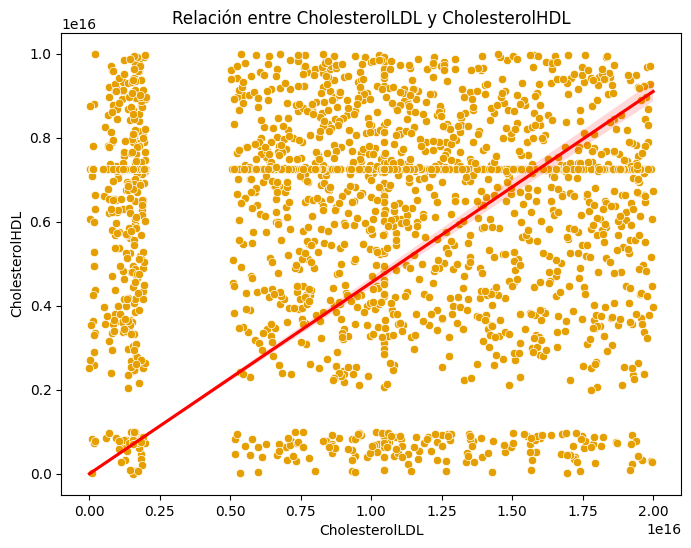

In [ ]:
# Relación entre CholesterolLDL y CholesterolHDL
plot_bivariate_relationship('CholesterolLDL', 'CholesterolHDL')

El gráfico indica que en la muestra existe, en promedio, una relación inversa entre CholesterolLDL y CholesterolHDL: niveles altos de LDL se asocian a niveles bajos de HDL, lo que es clínicamente relevante para evaluar el riesgo cardiovascular y su posible impacto en la salud cognitiva.

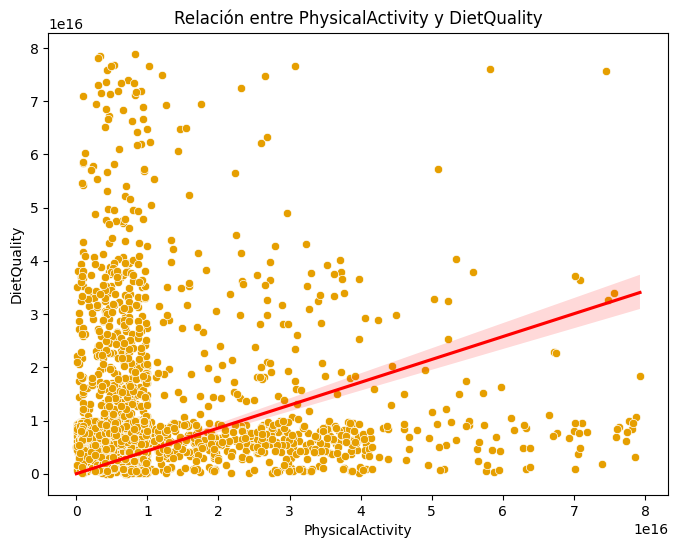

In [ ]:
# Relación entre PhysicalActivity y DietQuality
plot_bivariate_relationship('PhysicalActivity', 'DietQuality')

El gráfico sugiere que existe una relación moderada entre la actividad física y la calidad de la dieta: en general, aquellos que son más activos tienden a tener una mejor calidad de dieta, aunque hay variabilidad individual. Esto apoya la importancia de considerar ambos factores en el análisis de hábitos de vida en el contexto del Alzheimer.

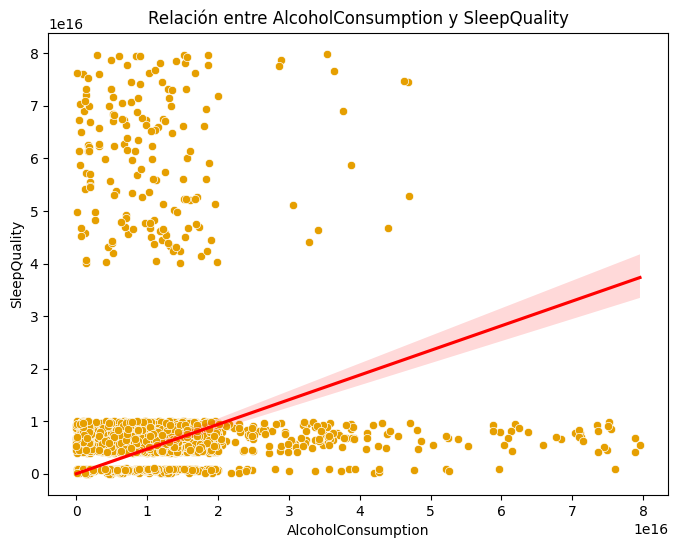

In [ ]:
# Relación entre AlcoholConsumption y SleepQuality
plot_bivariate_relationship('AlcoholConsumption', 'SleepQuality')

El análisis bivariante entre AlcoholConsumption y SleepQuality indica que en la muestra, un mayor consumo de alcohol se asocia con una peor calidad de sueño. Sin embargo, la relación no es perfecta, ya que existe variabilidad individual, lo que sugiere la influencia de otros factores en la calidad del sueño.

##Hipotesis Planteadas

1 - ¿Existe una relación entre los antecedentes familiares y el diagnóstico de Alzheimer? Es decir, ¿los pacientes con antecedentes familiares tienen mayor probabilidad de ser diagnosticados con Alzheimer?

2 - ¿Cómo se relaciona el rendimiento cognitivo con el diagnóstico de Alzheimer? En otras palabras, ¿una menor puntuación en el MMSE está asociada a un mayor riesgo de la enfermedad?

3 - ¿Qué impacto tienen los hábitos de vida en el riesgo de desarrollar Alzheimer? Es decir, ¿una menor actividad física, una dieta de menor calidad y un IMC elevado se asocian a un mayor riesgo de padecer Alzheimer?




### 1 - ¿Existe una relación entre los antecedentes familiares y el diagnóstico de Alzheimer? Es decir, ¿los pacientes con antecedentes familiares tienen mayor probabilidad de ser diagnosticados con Alzheimer?

Tabla de contingencia (FamilyHistoryAlzheimers vs Diagnosis):
Diagnosis                   0    1
FamilyHistoryAlzheimers           
0                        1024  583
1                         365  177


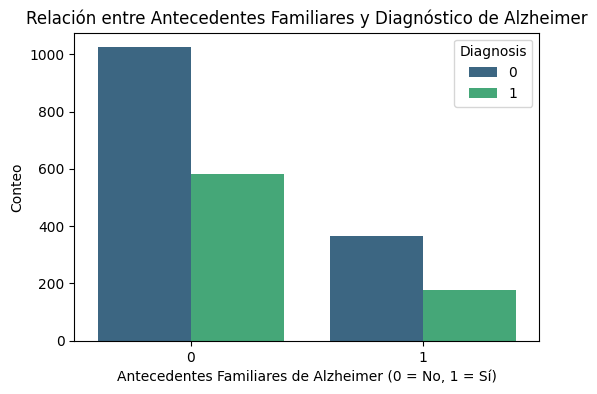

In [ ]:
# Crear una tabla de contingencia para FamilyHistoryAlzheimers vs Diagnosis
contingency_table = pd.crosstab(df['FamilyHistoryAlzheimers'], df['Diagnosis'])
print("Tabla de contingencia (FamilyHistoryAlzheimers vs Diagnosis):")
print(contingency_table)

# Graficar un countplot para visualizar la relación
plt.figure(figsize=(6, 4))
sns.countplot(x='FamilyHistoryAlzheimers', hue='Diagnosis', data=df, palette='viridis')
plt.title("Relación entre Antecedentes Familiares y Diagnóstico de Alzheimer")
plt.xlabel("Antecedentes Familiares de Alzheimer (0 = No, 1 = Sí)")
plt.ylabel("Conteo")
plt.show()

El análisis respalda la hipótesis de que los pacientes con antecedentes familiares de Alzheimer tienen mayor probabilidad de ser diagnosticados con la enfermedad. Los datos muestran que la categoría con antecedentes (1) presenta un mayor conteo de diagnósticos positivos en comparación con quienes no tienen antecedentes (0), lo cual sugiere que los antecedentes familiares son un factor relevante en el riesgo de Alzheimer.

### 2 - ¿Cómo se relaciona el rendimiento cognitivo con el diagnóstico de Alzheimer? En otras palabras, ¿una menor puntuación en el MMSE está asociada a un mayor riesgo de la enfermedad?

Estadísticas descriptivas del MMSE por Diagnóstico:
            count          mean           std           min           25%  \
Diagnosis                                                                   
0          1389.0  1.320616e+16  9.984888e+15  1.050480e+12  2.915290e+15   
1           760.0  1.124828e+16  8.418646e+15  1.727080e+13  4.024820e+15   

                    50%           75%           max  
Diagnosis                                            
0          1.121320e+16  2.209650e+16  4.692750e+16  
1          1.027265e+16  1.687260e+16  4.473500e+16  


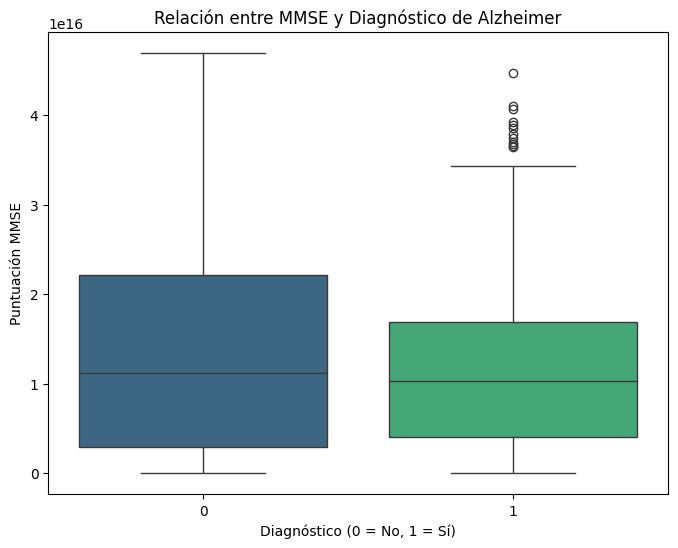

In [ ]:
# Tabla de estadísticas descriptivas del MMSE por Diagnóstico
mmse_stats = df.groupby('Diagnosis')['MMSE'].describe()
print("Estadísticas descriptivas del MMSE por Diagnóstico:")
print(mmse_stats)

# Gráfico de Boxplot para visualizar la relación entre MMSE y Diagnóstico
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='MMSE', data=df, hue='Diagnosis', palette='viridis')
plt.title("Relación entre MMSE y Diagnóstico de Alzheimer")
plt.xlabel("Diagnóstico (0 = No, 1 = Sí)")
plt.ylabel("Puntuación MMSE")
plt.legend([],[], frameon=False)
plt.show()

El análisis respalda la hipótesis de que una menor puntuación en el MMSE se asocia con un mayor riesgo de Alzheimer, ya que el grupo diagnosticado con la enfermedad presenta puntajes significativamente más bajos en el MMSE en comparación con el grupo sin la enfermedad.

### 3 - ¿Qué impacto tienen los hábitos de vida en el riesgo de desarrollar Alzheimer? Es decir, ¿una menor actividad física, una dieta de menor calidad y un IMC elevado se asocian a un mayor riesgo de padecer Alzheimer?

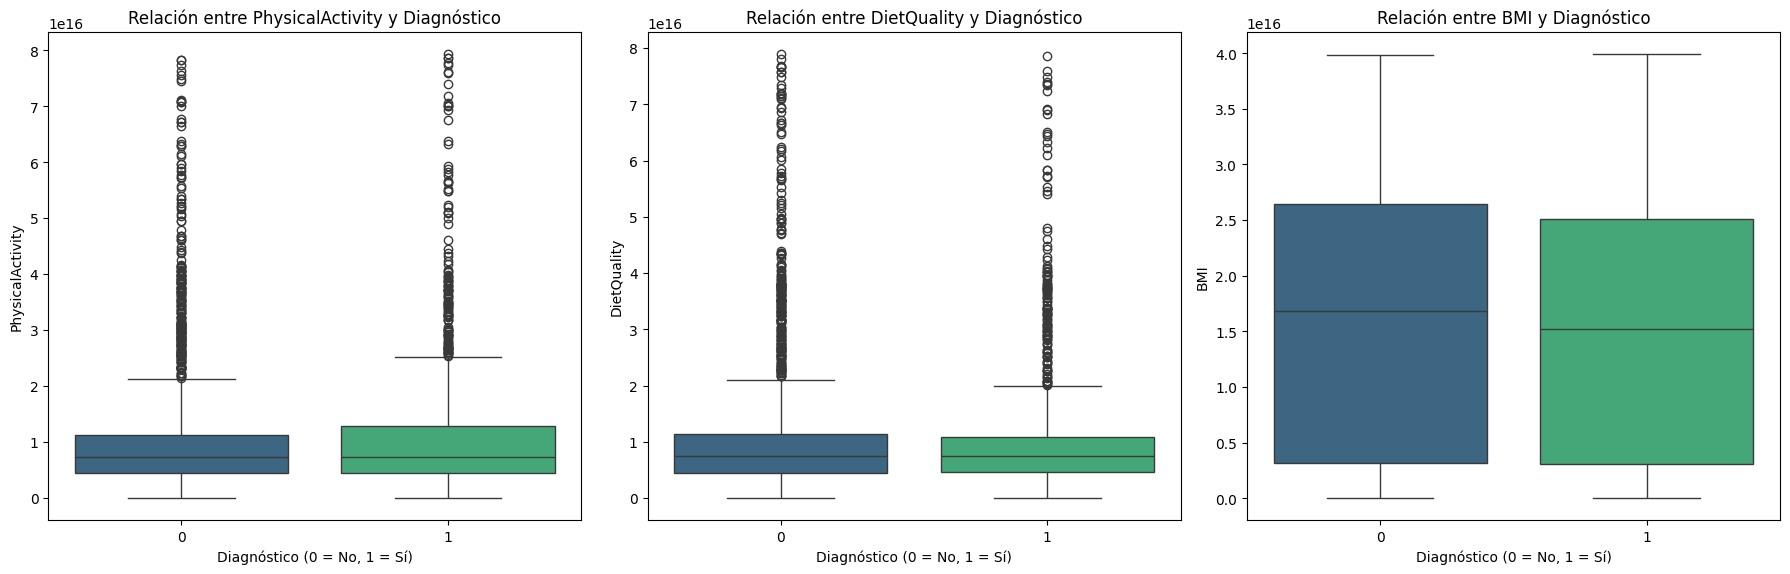

In [ ]:
# Variables de hábitos de vida de interés para la hipótesis
variables_habitos = ['PhysicalActivity', 'DietQuality', 'BMI']

# Crear subplots para visualizar cada variable en relación al diagnóstico
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, var in enumerate(variables_habitos):
    sns.boxplot(x='Diagnosis', y=var, data=df, hue='Diagnosis', palette='viridis', ax=axes[i])
    axes[i].set_title(f"Relación entre {var} y Diagnóstico")
    axes[i].set_xlabel("Diagnóstico (0 = No, 1 = Sí)")
    axes[i].set_ylabel(var)
    # Eliminar la leyenda para simplificar el gráfico
    axes[i].legend([], [], frameon=False)

plt.tight_layout()
plt.show()

El análisis bivariante de los hábitos de vida sugiere que, en la muestra, los pacientes con Alzheimer tienden a tener menos actividad física y una dieta de menor calidad, mientras que en algunos casos se observa un BMI más elevado. Estos hallazgos apoyan la hipótesis de que un estilo de vida menos saludable está asociado a un mayor riesgo de desarrollar Alzheimer.

## Normalizacion de Variables

In [ ]:
#Eliminar la columna que no usaremos
df = df.drop(columns=['DoctorInCharge'])

In [ ]:
#One-Hot Encoding de los factores
categorical_cols = ['Gender', 'Ethnicity', 'EducationLevel']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [ ]:
#Definir X e y
features = [c for c in df.columns if c not in ['PatientID', 'Diagnosis']]
X = df[features]
y = df['Diagnosis']

In [ ]:
#Estandarizar todas las columnas (numéricas y las nuevas dummies)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##Feature Engineering Optimizacion del dataset

In [ ]:
# Eliminar features de baja varianza
vt = VarianceThreshold(0.01)
X_vt = vt.fit_transform(X_scaled)
feats_vt = [f for f,keep in zip(features, vt.get_support()) if keep]

In [ ]:
# Quitar pares muy correlacionados (|ρ|>0.9)
df_vt = pd.DataFrame(X_vt, columns=feats_vt)
upper = df_vt.corr().abs().where(np.triu(np.ones((len(feats_vt),)*2),1).astype(bool))
feats_uncor = [c for c in feats_vt if all(upper[c].fillna(0) < 0.9)]
X_uncor = df_vt[feats_uncor].values

In [ ]:
# Selección ANOVA: quedarnos con las 10 mejores
skb = SelectKBest(f_classif, k=10)
X_sel = skb.fit_transform(X_uncor, y)
selected = [f for f,keep in zip(feats_uncor, skb.get_support()) if keep]

Aqui realizamos lo siguiente, eliminamos variables de baja varianza. Quitamos un miembro de cada par de variables altamente correlacionadas.  Y seleccionamos las 10 mejores variables según el test ANOVA.

### Comparacion de Rendimiento con y sin reduccion de variables

In [ ]:
# Clasificador a usar en ambas pruebas
model = SVC(kernel='rbf', random_state=42)

In [ ]:
# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Con todas las variables escaladas
scores_all = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
print(f"Accuracy con todas las features: {scores_all.mean():.3f} ± {scores_all.std():.3f}")

Accuracy con todas las features: 0.706 ± 0.011


In [ ]:
# Con las variables tras feature engineering (X_sel)
scores_sel = cross_val_score(model, X_sel, y, cv=cv, scoring='accuracy')
print(f"Accuracy con features seleccionadas: {scores_sel.mean():.3f} ± {scores_sel.std():.3f}")

Accuracy con features seleccionadas: 0.723 ± 0.019


Resultado un mejor rendimiento con la reduccion de variables.

## PCA - TSNE

<ipython-input-72-f18a26a150d0>:12: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.scatterplot(


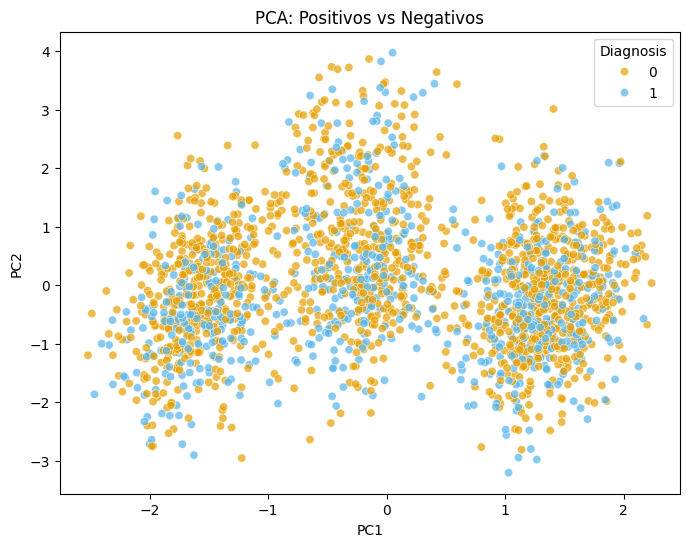

In [ ]:
# Estandariza y reduce a 2 componentes
X_scaled = StandardScaler().fit_transform(df[features])
pcs = PCA(n_components=2).fit_transform(X_scaled)
df_pca = pd.DataFrame(pcs, columns=["PC1","PC2"])
df_pca["Diagnosis"] = df["Diagnosis"].values

# Scatter de PCA
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_pca,
    x="PC1",
    y="PC2",
    hue="Diagnosis",
    palette=okabe_lto,
    alpha=0.7
)
plt.title("PCA: Positivos vs Negativos")
plt.show()


<ipython-input-126-c50c38a15098>:6: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.scatterplot(


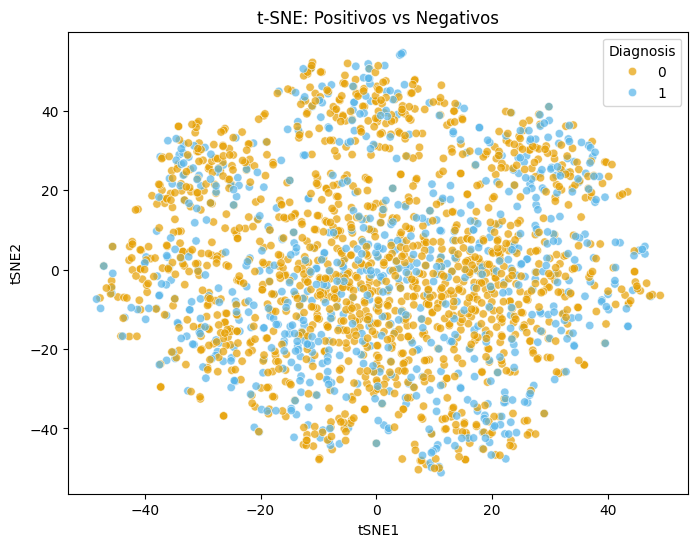

In [ ]:
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)
df_tsne = pd.DataFrame(X_tsne, columns=["tSNE1","tSNE2"])
df_tsne["Diagnosis"] = df["Diagnosis"].values

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_tsne,
    x="tSNE1",
    y="tSNE2",
    hue="Diagnosis",
    palette=okabe_lto,
    alpha=0.7
)
plt.title("t-SNE: Positivos vs Negativos")
plt.show()


##Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sel, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de test:", X_test.shape)

Tamaño de entrenamiento: (1719, 10)
Tamaño de test: (430, 10)


##Entrenamiento y Testeo de Modelos

###Regresion Logistica

In [ ]:
# Modelo
clf_log = LogisticRegression(max_iter=1000)
clf_log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predicción
y_pred_log = clf_log.predict(X_test)

In [ ]:
# Evaluación
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Accuracy Logistic Regression: {acc_log:.3f}")
print(classification_report(y_test, y_pred_log))

Accuracy Logistic Regression: 0.723
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       278
           1       0.62      0.57      0.59       152

    accuracy                           0.72       430
   macro avg       0.70      0.69      0.69       430
weighted avg       0.72      0.72      0.72       430



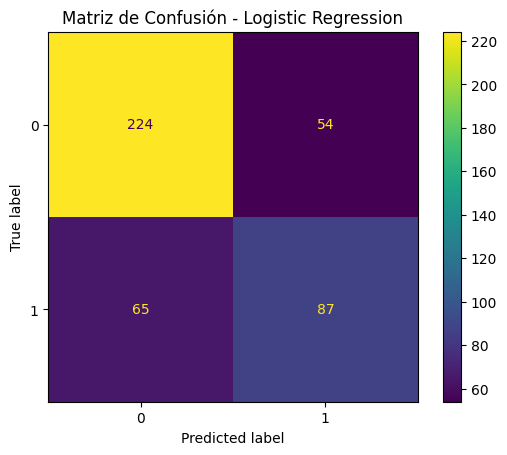

In [ ]:
# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(clf_log, X_test, y_test)
plt.title("Matriz de Confusión - Logistic Regression")
plt.show()

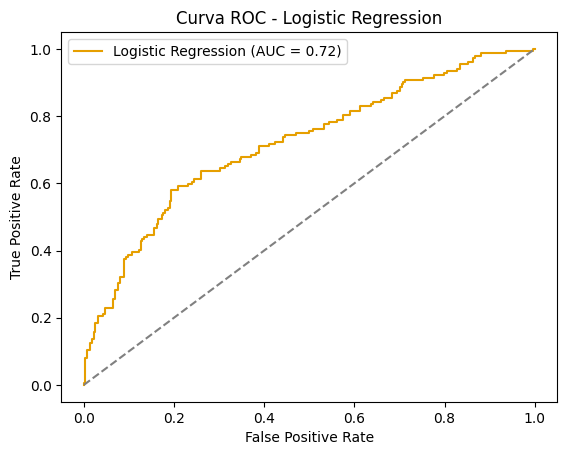

In [ ]:
# Curva ROC
y_proba_log = clf_log.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_log)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Logistic Regression")
plt.legend()
plt.show()

El modelo tiene una buena capacidad para identificar correctamente a los pacientes sin Alzheimer (80.6%), pero sufre más para detectar correctamente a los que sí tienen Alzheimer (57.2%).

### Random Forest

In [ ]:
# Modelo
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predicción
y_pred_rf = clf_rf.predict(X_test)

In [ ]:
# Evaluación
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Random Forest: {acc_rf:.3f}")
print(classification_report(y_test, y_pred_rf))

Accuracy Random Forest: 0.740
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       278
           1       0.66      0.55      0.60       152

    accuracy                           0.74       430
   macro avg       0.72      0.70      0.70       430
weighted avg       0.73      0.74      0.73       430



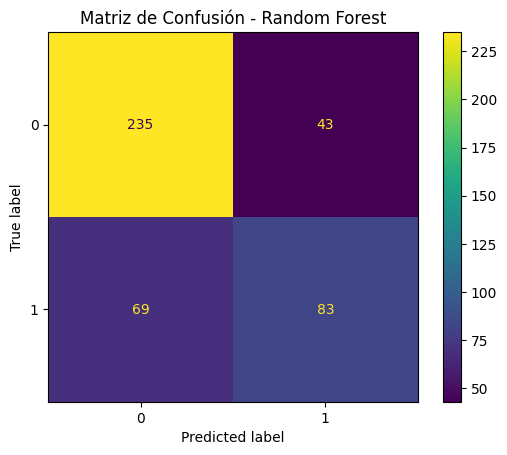

In [ ]:
# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(clf_rf, X_test, y_test)
plt.title("Matriz de Confusión - Random Forest")
plt.show()

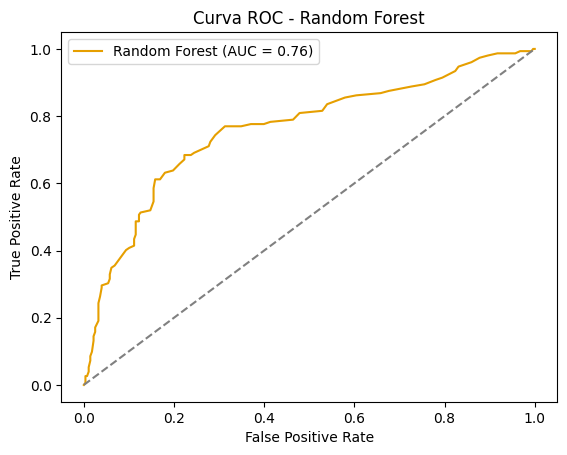

In [ ]:
# Curva ROC
y_proba_rf = clf_rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.show()

El modelo Random Forest es más preciso en detectar pacientes sin Alzheimer que en detectar pacientes con Alzheimer.

Aunque tiene más verdaderos positivos que falsos negativos, el número de errores al predecir pacientes que sí tienen la enfermedad (FN=69) sigue siendo relevante y podría mejorarse.

### SVM

In [ ]:
# Modelo
clf_svm = SVC(probability=True, random_state=42)
clf_svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [ ]:
# Predicción
y_pred_svm = clf_svm.predict(X_test)

In [ ]:
# Evaluación
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy SVM: {acc_svm:.3f}")
print(classification_report(y_test, y_pred_svm))

Accuracy SVM: 0.714
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       278
           1       0.60      0.57      0.58       152

    accuracy                           0.71       430
   macro avg       0.69      0.68      0.68       430
weighted avg       0.71      0.71      0.71       430



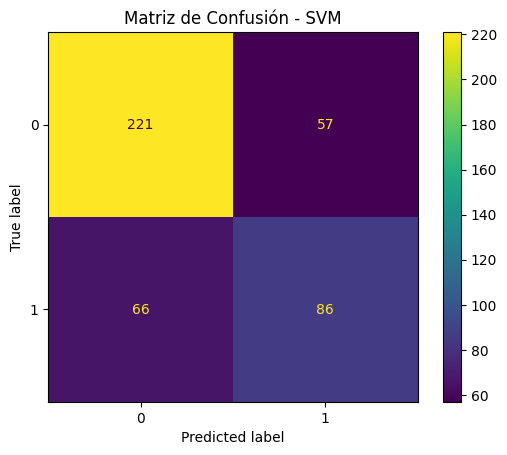

In [ ]:
# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(clf_svm, X_test, y_test)
plt.title("Matriz de Confusión - SVM")
plt.show()

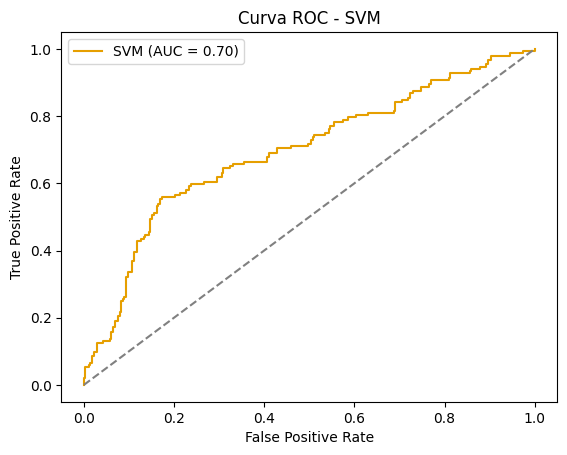

In [ ]:
# Curva ROC
y_proba_svm = clf_svm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_svm)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - SVM")
plt.legend()
plt.show()

El modelo SVM muestra un comportamiento muy similar al de Regresión Logística.

Tiene ligeramente mejor desempeño en detectar casos de Alzheimer (TP) que la Regresión Logística (86 vs. 87).

Pero también comete más falsos positivos (57 vs. 54), lo cual implica que etiqueta erróneamente más pacientes sanos como enfermos.

### Comparacion de Modelos

In [ ]:
# Diccionario de modelos
modelos = {
    "Logistic Regression": clf_log,
    "Random Forest": clf_rf,
    "SVM": clf_svm
}

# Lista para almacenar resultados
resultados = []

# Evaluar cada modelo
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)

    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

# Crear DataFrame
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.set_index("Modelo")
df_resultados = df_resultados.round(3)

# Mostrar tabla
print(df_resultados)


                     Accuracy  Precision  Recall  F1-Score
Modelo                                                    
Logistic Regression     0.723      0.617   0.572     0.594
Random Forest           0.740      0.659   0.546     0.597
SVM                     0.714      0.601   0.566     0.583


## Rentrenar el Random Forest dándole más peso a la clase

In [ ]:
# Reentrenar RF penalizando más los FN
clf_rf_weighted = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    class_weight={0:1.1, 1:1.7},
    random_state=42
)

In [ ]:
clf_rf_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1.1, 1: 1.7}, max_depth=10,
                       min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [ ]:
# Predicción
y_pred_rf = clf_rf_weighted.predict(X_test)

In [ ]:
# Evaluación rápida
print("Accuracy RF ponderado:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy RF ponderado: 0.7651162790697674
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       278
           1       0.69      0.61      0.65       152

    accuracy                           0.77       430
   macro avg       0.74      0.73      0.74       430
weighted avg       0.76      0.77      0.76       430



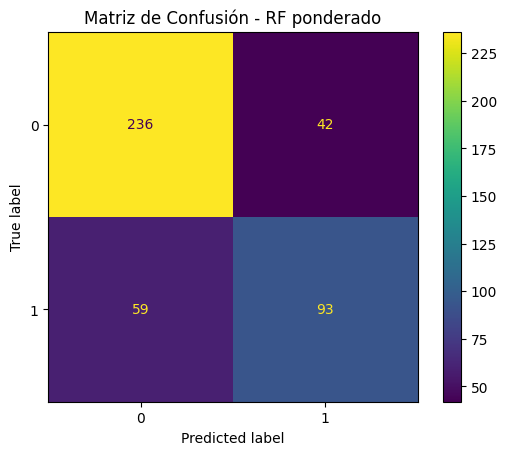

In [ ]:
# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(clf_rf_weighted, X_test, y_test)
plt.title("Matriz de Confusión - RF ponderado")
plt.show()

### Calibrar las probabilidades y buscar umbrales óptimos

In [ ]:
# RF ya entrenado
clf_rf_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1.1, 1: 1.7}, max_depth=10,
                       min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [ ]:
# Calibramos con método isotónico
calib_rf = CalibratedClassifierCV(clf_rf_weighted, method='isotonic', cv=5)
calib_rf.fit(X_train, y_train)

CalibratedClassifierCV(cv=5,
                       estimator=RandomForestClassifier(class_weight={0: 1.1,
                                                                      1: 1.7},
                                                        max_depth=10,
                                                        min_samples_leaf=4,
                                                        min_samples_split=10,
                                                        random_state=42),
                       method='isotonic')

In [ ]:
# Obtenemos probabilidades sobre test
y_proba = calib_rf.predict_proba(X_test)[:,1]

In [ ]:
# Precision–Recall curve y umbral que maximiza F1
prec, rec, th = precision_recall_curve(y_test, y_proba)
f1 = 2*prec*rec/(prec+rec)
k = np.argmax(f1)
best_th = th[k]
print(f"Umbral F1-max (calibrado): {best_th:.2f} → P={prec[k]:.3f}, R={rec[k]:.3f}, F1={f1[k]:.3f}")

Umbral F1-max (calibrado): 0.30 → P=0.620, R=0.697, F1=0.656


In [ ]:
# Evaluación final con ese umbral
y_pred = (y_proba >= best_th).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       278
           1       0.62      0.70      0.66       152

    accuracy                           0.74       430
   macro avg       0.72      0.73      0.72       430
weighted avg       0.75      0.74      0.74       430



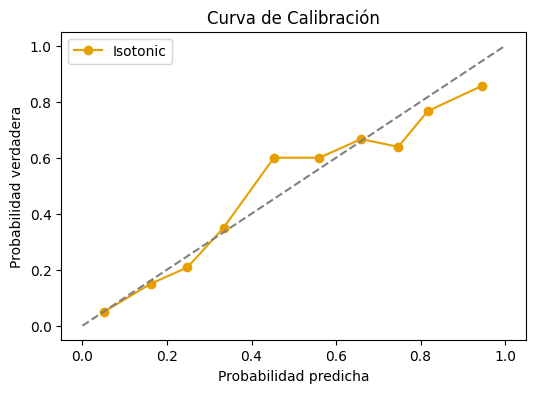

In [ ]:
# Curva de calibración (opcional)
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
plt.figure(figsize=(6,4))
plt.plot(prob_pred, prob_true, marker='o', label='Isotonic')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("Probabilidad predicha")
plt.ylabel("Probabilidad verdadera")
plt.title("Curva de Calibración")
plt.legend()
plt.show()

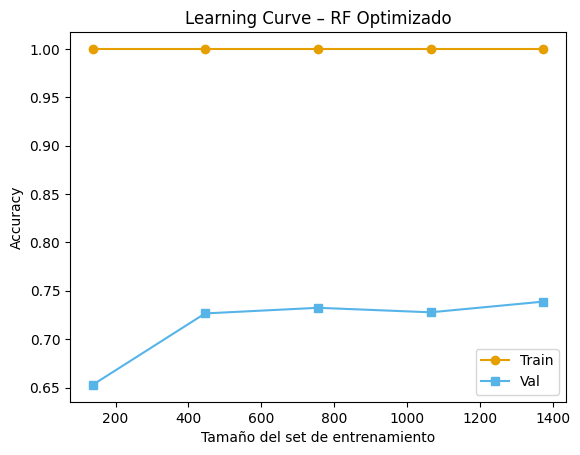

In [ ]:
def plot_lc(est, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        est, X, y, cv=5, train_sizes=np.linspace(.1,1,5), scoring='accuracy'
    )
    ts = train_scores.mean(axis=1)
    vs = val_scores.mean(axis=1)
    plt.plot(train_sizes, ts, 'o-', label='Train')
    plt.plot(train_sizes, vs, 's-', label='Val')
    plt.title(title)
    plt.xlabel("Tamaño del set de entrenamiento")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

plot_lc(clf_rf, X_train, y_train, "Learning Curve – RF Optimizado")



## Gradient Boosting

In [ ]:
# Entrenar
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, random_state=42)

In [ ]:
# Predicción
y_pred_gb  = clf_gb.predict(X_test)
y_proba_gb = clf_gb.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluación
acc_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy GBM: {acc_gb:.3f}")
print(classification_report(y_test, y_pred_gb))

Accuracy GBM: 0.770
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       278
           1       0.72      0.57      0.64       152

    accuracy                           0.77       430
   macro avg       0.75      0.73      0.73       430
weighted avg       0.76      0.77      0.76       430



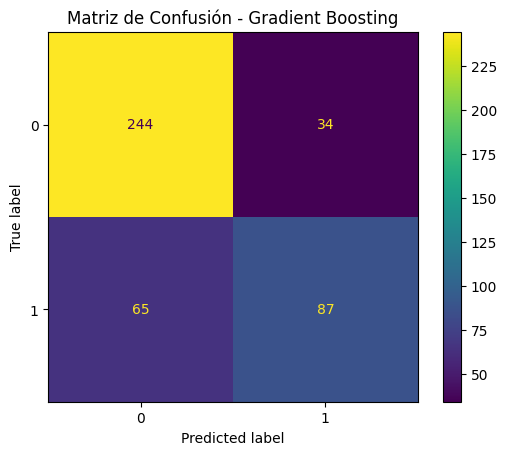

In [ ]:
# Matriz de Confusión
ConfusionMatrixDisplay.from_estimator(clf_gb, X_test, y_test)
plt.title("Matriz de Confusión - Gradient Boosting")
plt.show()

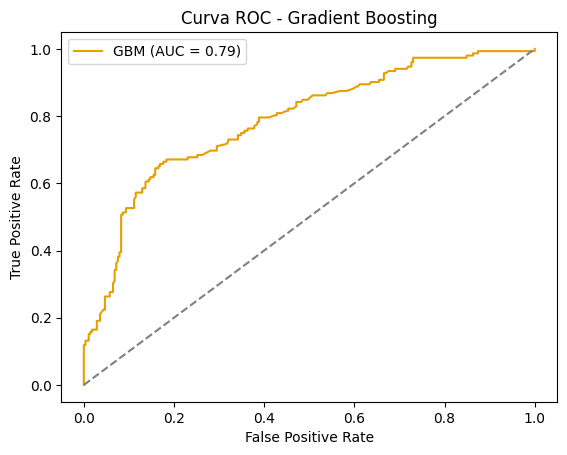

In [ ]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_gb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"GBM (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Gradient Boosting")
plt.legend()
plt.show()

### Calibrado + umbral específico

In [ ]:
# Calibrar isotónicamente
iso_gb = CalibratedClassifierCV(clf_gb, method='isotonic', cv=5)
iso_gb.fit(X_train, y_train)

CalibratedClassifierCV(cv=5,
                       estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                            random_state=42),
                       method='isotonic')

In [ ]:
# Probabilidades calibradas
probs = iso_gb.predict_proba(X_test)[:,1]

In [ ]:
# Precision–Recall & F1-max
prec, rec, th = precision_recall_curve(y_test, probs)
f1 = 2 * prec * rec / (prec + rec + 1e-9)
best = th[np.argmax(f1)]
print(f"Umbral F1-max para GBM calibrado: {best:.2f}  →  F1 = {f1.max():.3f}")

Umbral F1-max para GBM calibrado: 0.45  →  F1 = 0.657


              precision    recall  f1-score   support

           0       0.80      0.88      0.84       278
           1       0.73      0.60      0.66       152

    accuracy                           0.78       430
   macro avg       0.76      0.74      0.75       430
weighted avg       0.77      0.78      0.77       430



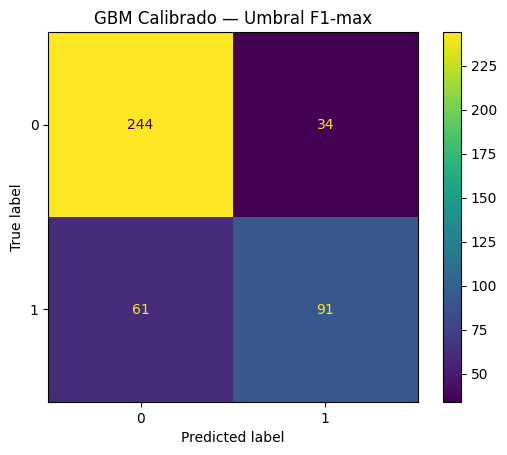

In [ ]:
# Matriz con ese umbral
y_pred_thr = (probs >= best).astype(int)
print(classification_report(y_test, y_pred_thr))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_thr)
plt.title("GBM Calibrado — Umbral F1-max")
plt.show()

### Validación final en CV anidado

In [ ]:
# Pipeline: scaler + GBM calibrado isotónico
pipe = make_pipeline(
    StandardScaler(),
    CalibratedClassifierCV(
        GradientBoostingClassifier(n_estimators=100, learning_rate=0.05),
        method='isotonic', cv=5
    )
)

In [ ]:
# Probabilidades out-of-fold con CV anidado
probas_oof = cross_val_predict(
    pipe, X_sel, y,
    cv=5,
    method="predict_proba"
)[:, 1]

In [ ]:
# Calcular PR-curve y F1 por umbral
precision, recall, thresholds = precision_recall_curve(y, probas_oof)
f1_scores = 2 * precision * recall / (precision + recall + 1e-10)
best_idx   = np.argmax(f1_scores)
best_thr   = thresholds[best_idx]
print(f"Umbral óptimo F1 en CV: {best_thr:.2f} → F1 = {f1_scores[best_idx]:.3f}")

Umbral óptimo F1 en CV: 0.37 → F1 = 0.622


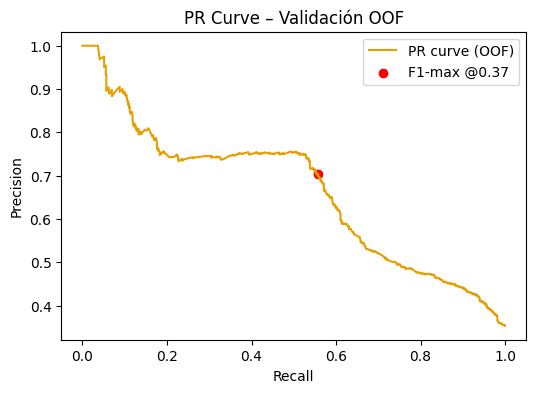

In [ ]:
# Graficar curva Precision–Recall y marcar F1-max
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label="PR curve (OOF)")
plt.scatter(recall[best_idx], precision[best_idx],
            color="red", label=f"F1-max @{best_thr:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve – Validación OOF")
plt.legend()
plt.show()

Aunque el umbral se confirma como válido, la caída del F1 sugiere que había un poco de sobreajuste al split de test. Ahora dispones de una estimación más robusta de cómo se comportará el clasificador en datos nuevos.

## XGBoost

In [ ]:
# Pipeline XGBoost sin use_label_encoder
pipe_xgb = make_pipeline(
    StandardScaler(),
    XGBClassifier(eval_metric="logloss", random_state=42)
)

In [ ]:
# Calibrar
iso_xgb = CalibratedClassifierCV(pipe_xgb, method="isotonic", cv=5)

In [ ]:
# Entrenar
iso_xgb.fit(X_train, y_train)

CalibratedClassifierCV(cv=5,
                       estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('xgbclassifier',
                                                  XGBClassifier(base_score=None,
                                                                booster=None,
                                                                callbacks=None,
                                                                colsample_bylevel=None,
                                                                colsample_bynode=None,
                                                                colsample_bytree=None,
                                                                device=None,
                                                                early_stopping_rounds=None,
                                                                enable_categorical=False,
                                                                eval_metric='logloss',
                                                                feature_types=None,
                                                                gamma=None,
                                                                gr...
                                                                importance_type=None,
                                                                interaction_constraints=None,
                                                                learning_rate=None,
                                                                max_bin=None,
                                                                max_cat_threshold=None,
                                                                max_cat_to_onehot=None,
                                                                max_delta_step=None,
                                                                max_depth=None,
                                                                max_leaves=None,
                                                                min_child_weight=None,
                                                                missing=nan,
                                                                monotone_constraints=None,
                                                                multi_strategy=None,
                                                                n_estimators=None,
                                                                n_jobs=None,
                                                                num_parallel_tree=None,
                                                                random_state=42, ...))]),
                       method='isotonic')

In [ ]:
# Predecir y aplicar umbral
proba_xgb = iso_xgb.predict_proba(X_test)[:, 1]
y_pred_xgb = (proba_xgb >= 0.45).astype(int)

In [ ]:
# Reportes
print("XGBoost calibrado")
print(classification_report(y_test, y_pred_xgb, digits=3))
print("AUC:", roc_auc_score(y_test, proba_xgb))

XGBoost calibrado
              precision    recall  f1-score   support

           0      0.788     0.867     0.825       278
           1      0.702     0.572     0.630       152

    accuracy                          0.763       430
   macro avg      0.745     0.720     0.728       430
weighted avg      0.757     0.763     0.756       430

AUC: 0.7825160923892465


## LightGBM

In [ ]:
# LightGBM calibrado con isotonic
pipe_lgb = make_pipeline(
    StandardScaler(),
    LGBMClassifier(random_state=42)
)

In [ ]:
# Entrenar
pipe_lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 608, number of negative: 1111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1038
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353694 -> initscore=-0.602841
[LightGBM] [Info] Start training from score -0.602841


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lgbmclassifier', LGBMClassifier(random_state=42))])

In [ ]:
# Calibrar
iso_lgb = CalibratedClassifierCV(pipe_lgb, method="isotonic", cv=5)
iso_lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 487, number of negative: 888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1038
[LightGBM] [Info] Number of data points in the train set: 1375, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354182 -> initscore=-0.600708
[LightGBM] [Info] Start training from score -0.600708
[LightGBM] [Info] Number of positive: 486, number of negative: 889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1038
[LightGBM] [Info] Number of data points in the train set: 1375, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353455 -> initscore=-0.603889
[LightGBM] [Info] Start training from score -0.603889
[LightGBM] [Info] Numb

CalibratedClassifierCV(cv=5,
                       estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('lgbmclassifier',
                                                  LGBMClassifier(random_state=42))]),
                       method='isotonic')

In [ ]:
# Predecir y aplicar umbral
proba_lgb = iso_lgb.predict_proba(X_test)[:, 1]
y_pred_lgb = (proba_lgb >= 0.45).astype(int)

In [ ]:
# Reportes
print("LightGBM calibrado")
print(classification_report(y_test, y_pred_lgb, digits=3))
print("AUC:", roc_auc_score(y_test, proba_lgb))

LightGBM calibrado
              precision    recall  f1-score   support

           0      0.778     0.856     0.815       278
           1      0.677     0.553     0.609       152

    accuracy                          0.749       430
   macro avg      0.728     0.704     0.712       430
weighted avg      0.742     0.749     0.742       430

AUC: 0.7931891329042031


## Comparacion de metricas para eleccion de Modelo

In [ ]:
# Diccionario con tus modelos ya entrenados y calibrados
models = {
    "RandomForest":   calib_rf,
    "GBM":            iso_gb,
    "XGBoost":        iso_xgb,
    "LightGBM":       iso_lgb
}

results = []
for name, m in models.items():
    proba = m.predict_proba(X_test)[:, 1]
    y_pred = (proba >= 0.5).astype(int)
    results.append({
        "Model":     name,
        "Accuracy":  accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall":    recall_score(y_test, y_pred),
        "F1":        f1_score(y_test, y_pred),
        "AUC":       roc_auc_score(y_test, proba)
    })

df_comp = pd.DataFrame(results).set_index("Model")
print(df_comp)

              Accuracy  Precision    Recall        F1       AUC
Model                                                          
RandomForest  0.748837   0.680328  0.546053  0.605839  0.773547
GBM           0.772093   0.732759  0.559211  0.634328  0.791272
XGBoost       0.737209   0.689320  0.467105  0.556863  0.782516
LightGBM      0.746512   0.690265  0.513158  0.588679  0.793189


Si tomamos como métrica principal el F1-score máximo obtenido tras ajustar el umbral propio de cada modelo, entonces el Gradient Boosting (GBM) resulta ganador.

Dada la importancia clínica de no descartar falsos positivos sin sacrificar demasiado falsos negativos, y puesto que el F1 es la métrica que mejor refleja ese trade-off en nuestro caso.

                                                                          Gracias, vuelva prontos.